## Problem Statement

In developing economies, financial markets are vital for economic growth by channeling savings into productive investments. Banks face significant challenges with credit risk, as mismanagement can lead to collapse. Loans are a core business component for banks, and their profitability depends on customers repaying these loans.

Accurately identifying genuine loan applicants is difficult, and manual processes are prone to errors, increasing credit risk. This risk, defined as the potential for borrowers to default, threatens the bank's financial stability. To mitigate this and reduce Non-Performing Assets (NPAs), banks need effective prediction methods for loan defaulters.

Research shows that machine learning can predict defaults efficiently by analyzing historical data. The goal of this study is to develop a machine learning model to predict loan defaulters, aiding banks in managing credit risks and improving financial stabil

Banks need to accurately predict loan defaulters to manage credit risk and ensure profitability, despite having limited information about applicants. This necessitates the development of a machine learning model to estimate the likelihood of loan repayment based on historical data and trends.ity.

## Objective

The objective of this study is to develop a machine learning model that can accurately predict loan defaulters, helping banks manage credit risk effectively and reduce Non-Performing Assets (NPAs). This model will analyze historical data and trends to provide reliable assessments of applicants' likelihood to repay their loans, thereby improving the bank's financial stability and decision-making process.

## Few questions need to ask before proceeding !

1. Historical data is available 
2. Target column is given - `Loan Status` (Supervised learning)
3. Datatype of target column - `Discrete` (Classification)
4. Models in use - All classification models
5. Evaluation Metrics - Accuracy score

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv(r"C:\Users\isham\Downloads\credit_risk_dataset.csv", na_values=['NA', 'null', '', ' '])
d.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Copy original data for preventing the data loss

df = d.copy()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
#Unique Values in dataset

for i in df.columns.tolist():
    print(f'{i}:',df[i].unique())
    print()

person_age: [ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40  50  45  37  39  44  43  41  46  38  47  42  48  49  58  65  51
  53  66  61  54  57  59  62  60  55  52  64  70  78  69  56  73  63  94
  80  84  76  67]

person_income: [  59000    9600   65500 ...  720000 1900000    4888]

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

person_emp_length: [123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.  19.  15.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]

loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']

loan_amnt: [35000  1000  5500  2500  1600  4500 30000  1750 34800 34000  1500 33950
 33000  4575  1400 32500  4000  2000 32000 31050 24250  7800 20000 10000
 25000 18000 12000 29100 28000  9600  3000  6100  4200  4750  4800  2700
 27600  3250 27500 27050 27000 26000 25600

## Data Cleaning 

### Renaming column names

In [8]:
df = df.rename(columns={'person_age':'age', 'person_income':'income','person_home_ownership':'home_ownership', 
                   'person_emp_length':'emp_length', 'loan_percent_income': 'loan_pct_income', 'cb_person_default_on_file':'default_history',
                  'cb_person_cred_hist_length':'cred_hist_length'})

df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_pct_income,default_history,cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Rearranging the order of columns, keeping target column at the end for better understanding

In [9]:
df = df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,8]]

In [10]:
df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


### Changing the case in title case in categorical columns

In [11]:
df['home_ownership'] = df['home_ownership'].apply(lambda i: i.title())
df['loan_intent'] = df['loan_intent'].apply(lambda i: i.title())

In [12]:
df['home_ownership'].unique()

array(['Rent', 'Own', 'Mortgage', 'Other'], dtype=object)

In [13]:
df['loan_intent'].unique()

array(['Personal', 'Education', 'Medical', 'Venture', 'Homeimprovement',
       'Debtconsolidation'], dtype=object)

### Removing Null values

In [14]:
df.isnull().sum()

age                    0
income                 0
home_ownership         0
emp_length           895
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate       3116
loan_pct_income        0
default_history        0
cred_hist_length       0
loan_status            0
dtype: int64

In [15]:
df['emp_length'].median()

4.0

In [16]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

In [17]:
df['emp_length'].isna().sum()

0

In [18]:
df['loan_int_rate'].median()

10.99

In [19]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [20]:
df['loan_int_rate'].isna().sum()

0

In [21]:
df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
0,22,59000,Rent,123.0,Personal,D,35000,16.02,0.59,Y,3,1
1,21,9600,Own,5.0,Education,B,1000,11.14,0.10,N,2,0
2,25,9600,Mortgage,1.0,Medical,C,5500,12.87,0.57,N,3,1
3,23,65500,Rent,4.0,Medical,C,35000,15.23,0.53,N,2,1
4,24,54400,Rent,8.0,Medical,C,35000,14.27,0.55,Y,4,1


### Changing the datatype

In [22]:
# Changing datatype of emp_length column from float to int as it is in years so it can't be float

df['emp_length'] = df['emp_length'].astype('int64')

In [23]:
df['emp_length'].dtype

dtype('int64')

In [24]:
df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
0,22,59000,Rent,123,Personal,D,35000,16.02,0.59,Y,3,1
1,21,9600,Own,5,Education,B,1000,11.14,0.10,N,2,0
2,25,9600,Mortgage,1,Medical,C,5500,12.87,0.57,N,3,1
3,23,65500,Rent,4,Medical,C,35000,15.23,0.53,N,2,1
4,24,54400,Rent,8,Medical,C,35000,14.27,0.55,Y,4,1


### Outlier Identification & Removal

In [25]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

print('Age Outliers:',detect_outliers_iqr(df['age']))
print()
print('Income Outliers:',detect_outliers_iqr(df['income']))
print()
print('Person Employement Length Outliers:',detect_outliers_iqr(df['emp_length']))
print()
print('Loan Amount Outliers:',detect_outliers_iqr(df['loan_amnt']))
print()
print('Loan Interest Rate Outliers:',detect_outliers_iqr(df['loan_int_rate']))
print()
print('Loan Percent Income Outliers:',detect_outliers_iqr(df['loan_pct_income']))
print()
print('Credit History length Outliers:',detect_outliers_iqr(df['cred_hist_length']))
print()

Age Outliers: [41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 4

It could be seen that dataset is having heavy outliers in huge number and few majority seems valid outliers, so based on threshold percentile value will remove the outliers accordingly so that it will not have major impact on the model.

### Age Column outlier treatment

<Axes: xlabel='age'>

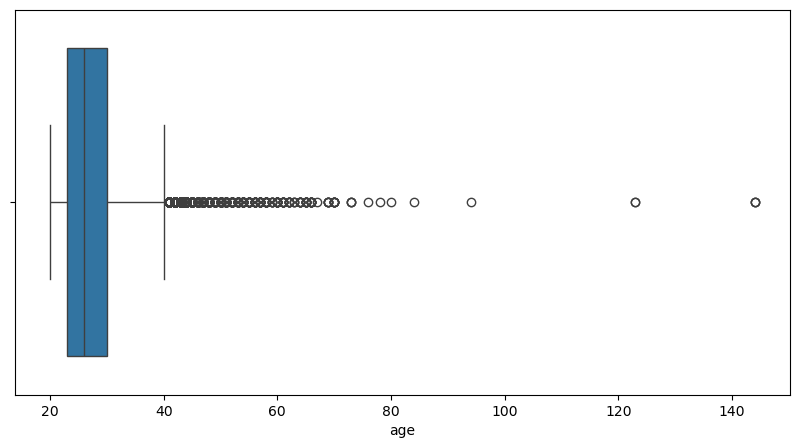

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(df['age'], orient='h')

In [27]:
df.age.quantile([0.5, 0.75,0.90, 0.95, 0.99, 0.9996])

0.5000    26.0
0.7500    30.0
0.9000    36.0
0.9500    40.0
0.9900    50.0
0.9996    70.0
Name: age, dtype: float64

In age, it is being seen that more than 100 like 123 and 144 as age is present which is again highly impossible, so we will remove it, otherwise it will have very high impact on the model. So there are huge outliers which are very far away from the data distribution so we will take a threshold of 99.96 percentile as age of 70 and above that we will remove all the outliers.

In [28]:
age_threshold = df['age'].quantile(0.9996)

In [29]:
df = df[df['age'] <= age_threshold].reset_index(drop=True)

<Axes: xlabel='age'>

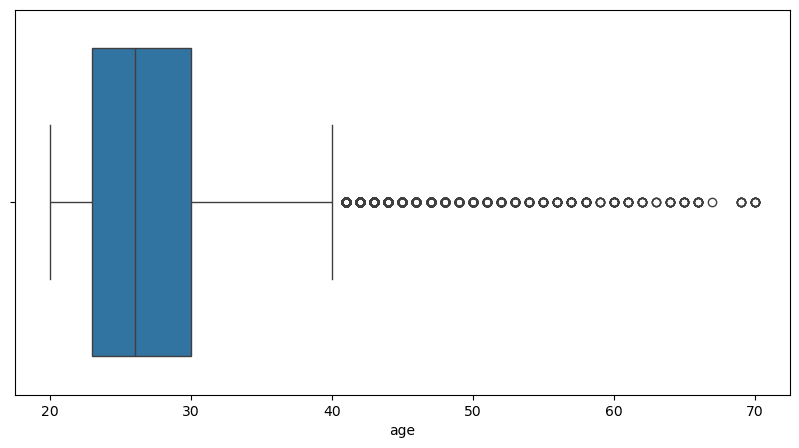

In [30]:
#Age column, after removal of major outliers
plt.figure(figsize=(10,5))
sns.boxplot(df['age'], orient='h')

### Income Column outlier treatment

<Axes: xlabel='income'>

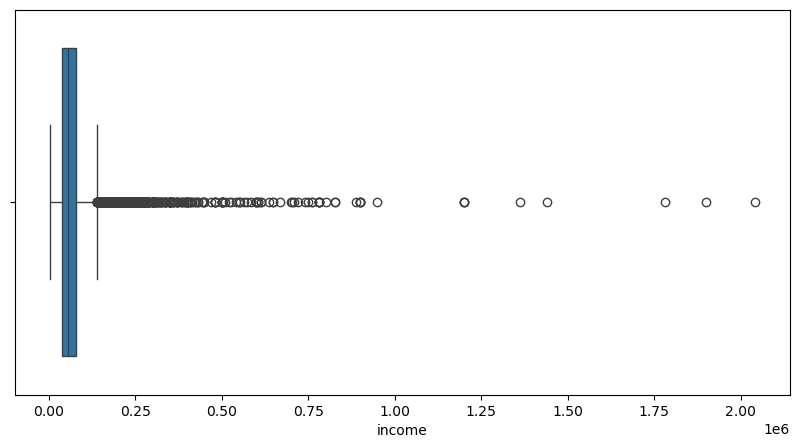

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(df['income'], orient='h')

In [32]:
df.income.quantile([0.5, 0.75,0.90, 0.95, 0.99])

0.50     55000.0
0.75     79200.0
0.90    110004.0
0.95    138000.0
0.99    225000.0
Name: income, dtype: float64

There are huge number of outliers which are too far away from the datapoints and not in continuous also, hence will remove those. Considering the threshold of 99 percentile value from income column, so that we will not be into much data loss also.

In [33]:
income_threshold = df['income'].quantile(0.99)

df = df[df['income'] <= income_threshold].reset_index(drop=True)

<Axes: xlabel='income'>

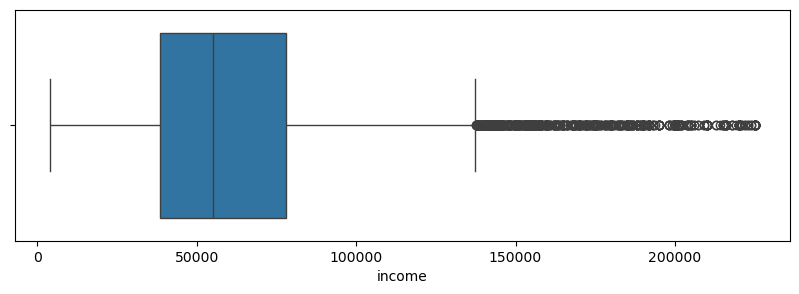

In [34]:
#Income column, after removal of major outliers
plt.figure(figsize=(10,3))
sns.boxplot(df['income'], orient='h')

### Person Employement Length Outlier Treatment

<Axes: xlabel='emp_length'>

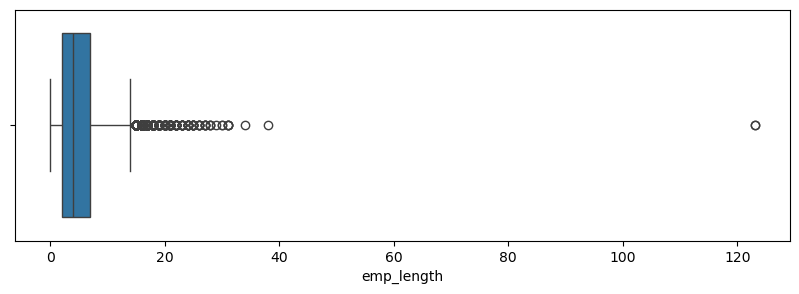

In [35]:
plt.figure(figsize=(10,3))
sns.boxplot(df['emp_length'], orient='h')

In [36]:
df.emp_length.quantile([0.5, 0.75, 0.95, 0.99, 0.9998])

0.5000     4.0
0.7500     7.0
0.9500    12.0
0.9900    17.0
0.9998    31.0
Name: emp_length, dtype: float64

It could be seen that person's employee length is having a very major outlier which will effect the model heavily, hence will remove it. In the case of person's employee length column having 123 is not possible in real day-to-day that a person working for 123 years, so indeed it is an error. Hence removing it. Keeping the threshold of 99.98 percentile value for considering upto atleast 30 years employement length.

In [37]:
emp_length_threshold = df['emp_length'].quantile(0.9998)

df = df[df['emp_length'] <= emp_length_threshold].reset_index(drop=True)

<Axes: xlabel='emp_length'>

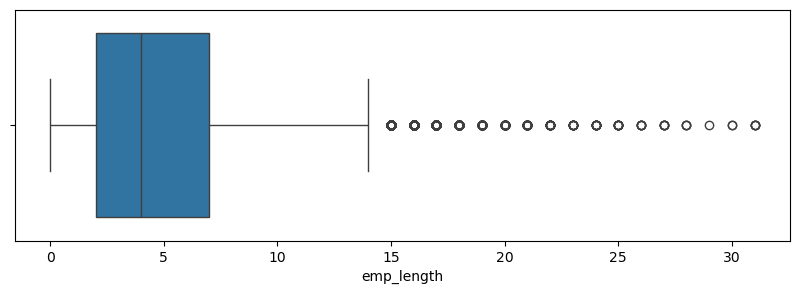

In [38]:
#Employee Length column, after removal of major outliers
plt.figure(figsize=(10,3))
sns.boxplot(df['emp_length'], orient='h')

### Loan Amount Outliers

<Axes: xlabel='loan_amnt'>

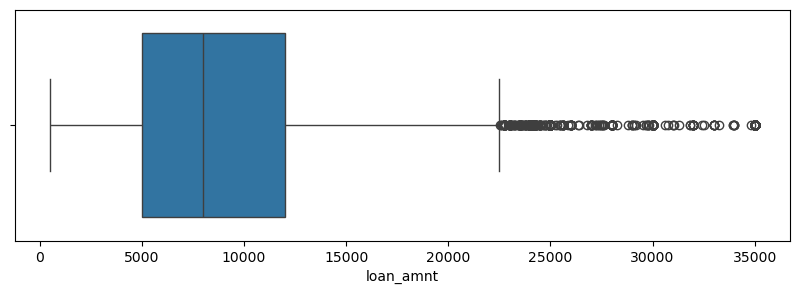

In [39]:
plt.figure(figsize=(10,3))
sns.boxplot(df['loan_amnt'], orient='h')

In [40]:
df.loan_amnt.quantile([0.5, 0.75, 0.95, 0.97, 0.98, 0.99])

0.50     8000.0
0.75    12000.0
0.95    22807.5
0.97    25000.0
0.98    25000.0
0.99    28000.0
Name: loan_amnt, dtype: float64

In this distribution, outliers are mostly in continuous form, hence not removing outliers here from loan amount.

### Loan Interest Rate Outliers

<Axes: xlabel='loan_int_rate'>

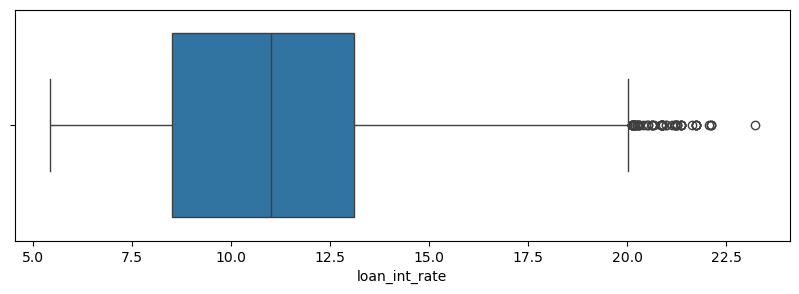

In [41]:
plt.figure(figsize=(10,3))
sns.boxplot(df['loan_int_rate'], orient='h')

In [42]:
df.loan_int_rate.quantile([0.5, 0.75, 0.95, 0.97, 0.98, 0.99])

0.50    10.99
0.75    13.11
0.95    16.29
0.97    16.77
0.98    17.49
0.99    18.39
Name: loan_int_rate, dtype: float64

In this distribution, outliers are mostly in continuous form, hence not removing outliers here from loan interest rate.

### Loan Percent Income Outlier

<Axes: xlabel='loan_pct_income'>

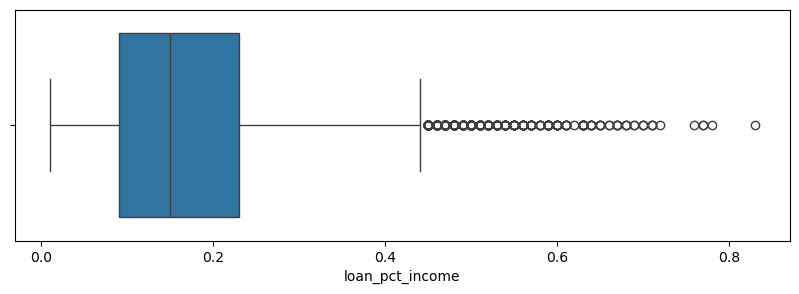

In [43]:
plt.figure(figsize=(10,3))
sns.boxplot(df['loan_pct_income'], orient='h')

In [44]:
df.loan_pct_income.quantile([0.5, 0.75, 0.95, 0.97, 0.98, 0.99])

0.50    0.15
0.75    0.23
0.95    0.38
0.97    0.42
0.98    0.45
0.99    0.50
Name: loan_pct_income, dtype: float64

In this distribution, outliers are mostly in continuous form, hence not removing outliers here from loan percent income.

### Credit History Length Outliers

<Axes: xlabel='cred_hist_length'>

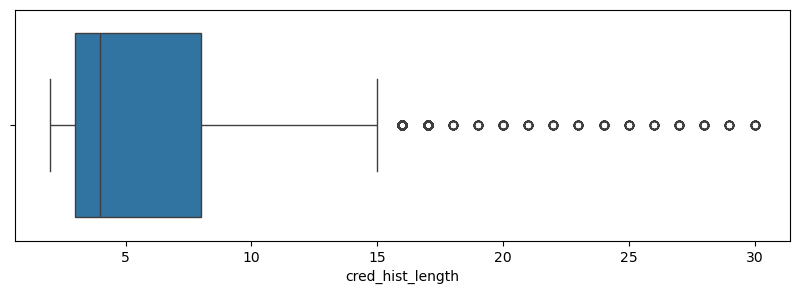

In [45]:
plt.figure(figsize=(10,3))
sns.boxplot(df['cred_hist_length'], orient='h')

In [46]:
df.cred_hist_length.quantile([0.5, 0.75, 0.95, 0.97, 0.98, 0.99])

0.50     4.0
0.75     8.0
0.95    14.0
0.97    16.0
0.98    17.0
0.99    17.0
Name: cred_hist_length, dtype: float64

In this distribution, outliers are mostly in continuous form, hence not removing outliers here from credit history length.

In [47]:
#Cleaned Dataset

df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
0,21,9600,Own,5,Education,B,1000,11.14,0.10,N,2,0
1,25,9600,Mortgage,1,Medical,C,5500,12.87,0.57,N,3,1
2,23,65500,Rent,4,Medical,C,35000,15.23,0.53,N,2,1
3,24,54400,Rent,8,Medical,C,35000,14.27,0.55,Y,4,1
4,21,9900,Own,2,Venture,A,2500,7.14,0.25,N,2,1


## Exploratory Data Analysis (EDA)

## Univariate Analysis 

### Target Column distribution - Loan Status

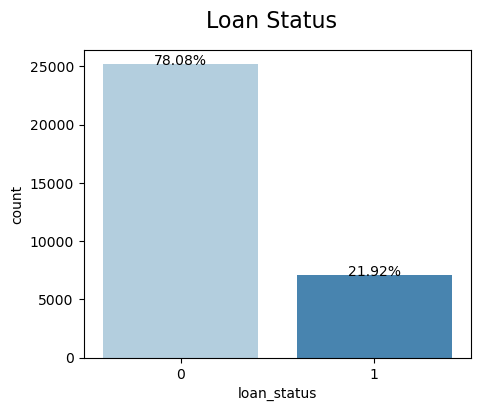

In [48]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='loan_status', data=df, palette='Blues')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")
    
plt.suptitle('Loan Status', fontsize=16)
plt.show()

#### Observation - 

Target feature is highly imbalanced. 78% of the loan borrowers are non-defaulters which is actually we want for making bank profitable and rest 22% of the borrowers are loan defaulters.

### A) Demographic Details of Borrowers 

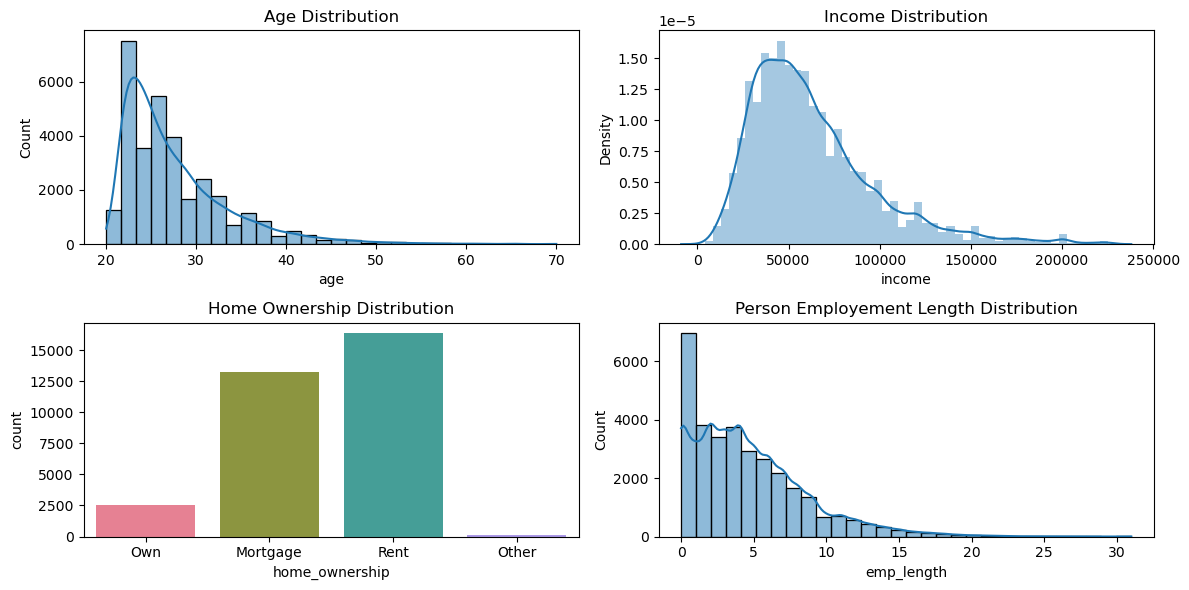

In [49]:
fig, axs = plt.subplots(2,2, figsize= (12,6))

sns.histplot(df['age'], bins=30,kde=True, ax=axs[0,0])
axs[0,0].set_title('Age Distribution')

sns.distplot(df['income'], ax=axs[0,1])
axs[0,1].set_title('Income Distribution')

sns.countplot(x='home_ownership', data=df, palette='husl', ax=axs[1,0])
axs[1,0].set_title('Home Ownership Distribution')

sns.histplot(df['emp_length'], bins=30,kde=True, ax=axs[1,1])
axs[1,1].set_title('Person Employement Length Distribution')

plt.tight_layout()
plt.show()

#### Observation

1. Majority of the borrowers are younger peoples within the age group of 20-30. Very few borrowers are from old age group.
2. Average income of the borrowers is around 62000. 90% of the borrowers are having income which is below than 130000.
3. 51% of the borrowers are staying in rent, 41% are having their home in mortgage whereas only 8% borrowers are having their own home.
4. Borrowers with 0-5 years range of employee length could be seen heavily. 90% of the borrowers are having employement length less than 10 years. Also it could be seen that many borrowers are having no employement years history. 

### B) Loan Details of Borrowers 

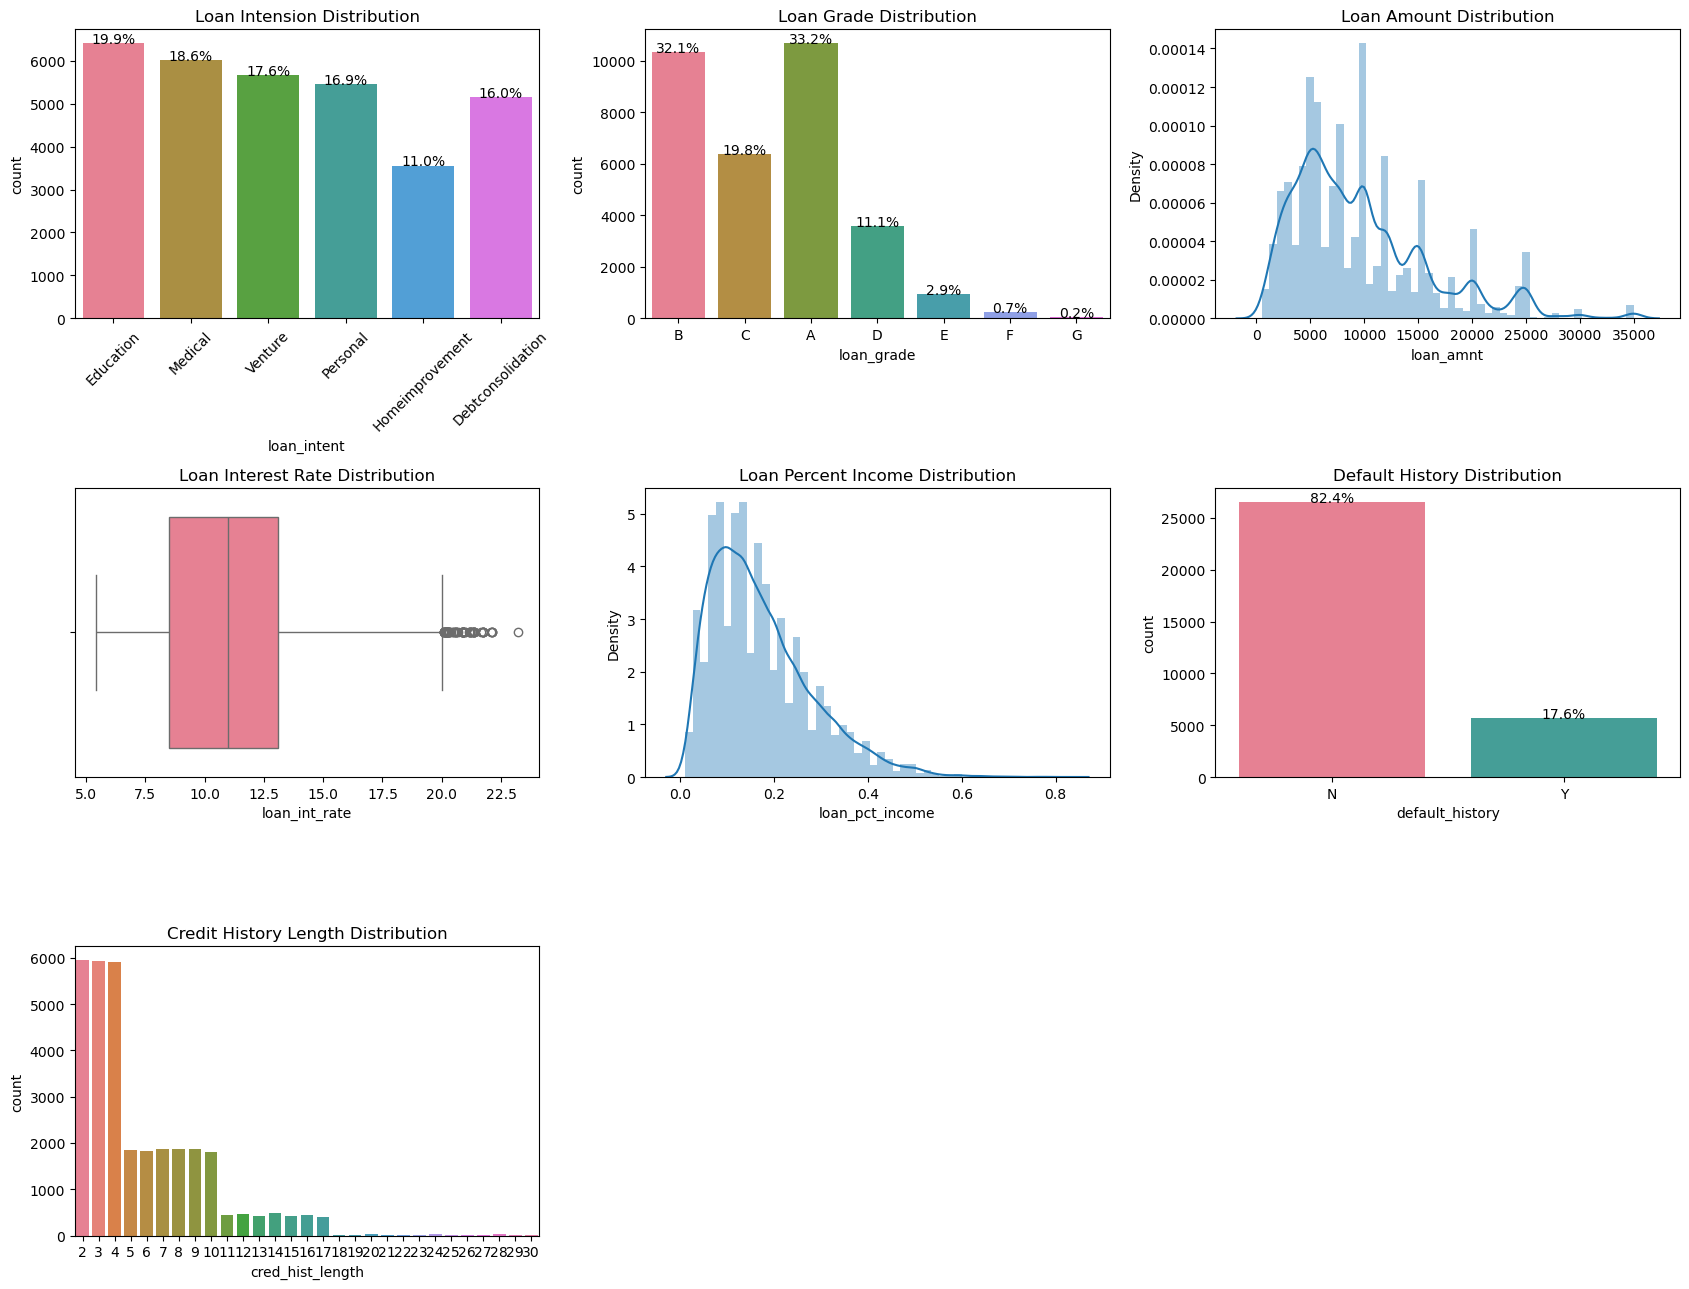

In [50]:
fig, axs = plt.subplots(3,3, figsize= (17,13))

sns.countplot(x='loan_intent', data=df, palette='husl', ax=axs[0,0])
axs[0,0].set_title('Loan Intension Distribution')
axs[0,0].tick_params(axis='x', rotation=45)

total = len(df)
for p in axs[0,0].patches:
    height = p.get_height()
    axs[0,0].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")


sns.countplot(x='loan_grade', data=df, palette='husl', ax=axs[0,1])
axs[0,1].set_title('Loan Grade Distribution')

total = len(df)
for p in axs[0,1].patches:
    height = p.get_height()
    axs[0,1].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.distplot(df['loan_amnt'], ax=axs[0,2])
axs[0,2].set_title('Loan Amount Distribution')

sns.boxplot(df['loan_int_rate'],palette='husl', ax=axs[1,0], orient='h')
axs[1,0].set_title('Loan Interest Rate Distribution')

sns.distplot(df['loan_pct_income'], ax=axs[1,1])
axs[1,1].set_title('Loan Percent Income Distribution')

sns.countplot(x='default_history', data=df, palette='husl', ax=axs[1,2])
axs[1,2].set_title('Default History Distribution')

total = len(df)
for p in axs[1,2].patches:
    height = p.get_height()
    axs[1,2].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='cred_hist_length', data=df, palette='husl', ax=axs[2,0])
axs[2,0].set_title('Credit History Length Distribution')

axs[2, 1].set_visible(False)
axs[2, 2].set_visible(False)

plt.tight_layout()
plt.show()

#### Observation

1. 20% of the borrowers are opting loan for Educational purpose followed by Medical and Venture. But the differences are minimal.
2. Most of the borrowers are having either A or B grade which is actually good to see that borrowers are seems to be maintain good grades.
3. Most of the loan amount are in the range of 5000-15000. Approx 9500 is the average loan amount taken by the borrowers. Major amount can be seen in the higher side as outliers.
4. Interest rates are lying between the range of 8-13% approx.  More than 20% interest rates could be seen in the higher side of the data.
5. 17% is the average loan-to-income ratio which is quite good. 95% of the borrowers are having less than 38% loan-to-income ratio.
6. 82% of the borrowers are having no default history before.
7. Majority of the borrowers are having credit history length between 2-4 years.

In [51]:
df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
0,21,9600,Own,5,Education,B,1000,11.14,0.10,N,2,0
1,25,9600,Mortgage,1,Medical,C,5500,12.87,0.57,N,3,1
2,23,65500,Rent,4,Medical,C,35000,15.23,0.53,N,2,1
3,24,54400,Rent,8,Medical,C,35000,14.27,0.55,Y,4,1
4,21,9900,Own,2,Venture,A,2500,7.14,0.25,N,2,1


## Bivariate Analysis

In [52]:
from dython.nominal import associations
correlation_matrix = associations(df, compute_only=True)['corr']
correlation_matrix

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
age,1.000000,0.101555,0.031285,0.164947,0.116797,0.015975,0.044775,0.010274,-0.031824,0.006199,0.877679,-0.017898
income,0.101555,1.000000,0.313830,0.189988,0.091216,0.056105,0.400788,-0.018466,-0.345022,0.017837,0.079339,-0.234488
home_ownership,0.031285,0.313830,1.000000,0.238196,0.087470,0.087385,0.126232,0.139177,0.144733,0.065951,0.023973,0.242321
emp_length,0.164947,0.189988,0.238196,1.000000,0.046913,0.062890,0.107756,-0.055367,-0.053714,0.030157,0.141326,-0.086404
loan_intent,0.116797,0.091216,0.087470,0.046913,1.000000,0.016932,0.046017,0.022082,0.018905,0.011372,0.096157,0.126184
loan_grade,0.015975,0.056105,0.087385,0.062890,0.016932,1.000000,0.175148,0.905452,0.139514,0.632927,0.016399,0.415160
loan_amnt,0.044775,0.400788,0.126232,0.107756,0.046017,0.175148,1.000000,0.135584,0.596893,0.037649,0.034762,0.109055
loan_int_rate,0.010274,-0.018466,0.139177,-0.055367,0.022082,0.905452,0.135584,1.000000,0.117779,0.476869,0.014415,0.319927
loan_pct_income,-0.031824,-0.345022,0.144733,-0.053714,0.018905,0.139514,0.596893,0.117779,1.000000,0.037760,-0.021988,0.380191
default_history,0.006199,0.017837,0.065951,0.030157,0.011372,0.632927,0.037649,0.476869,0.037760,1.000000,0.003125,0.179054


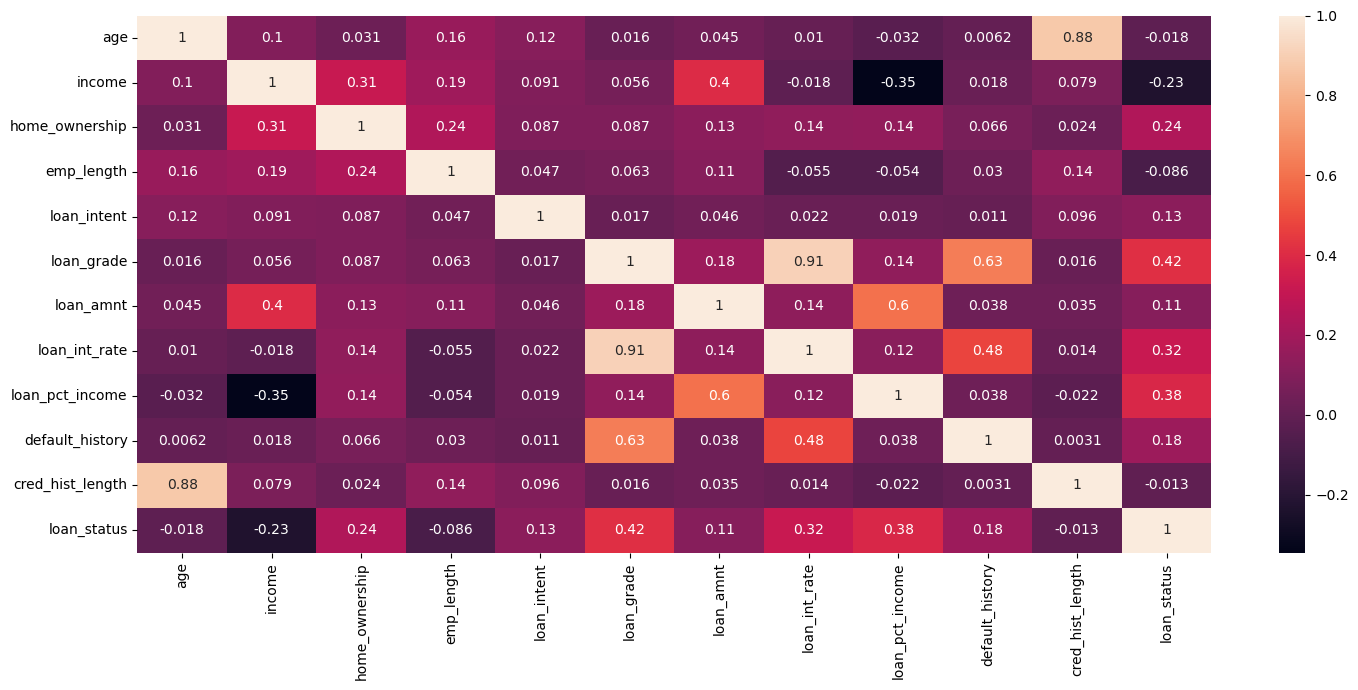

In [53]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()

### Loan Status and All Categorical Columns

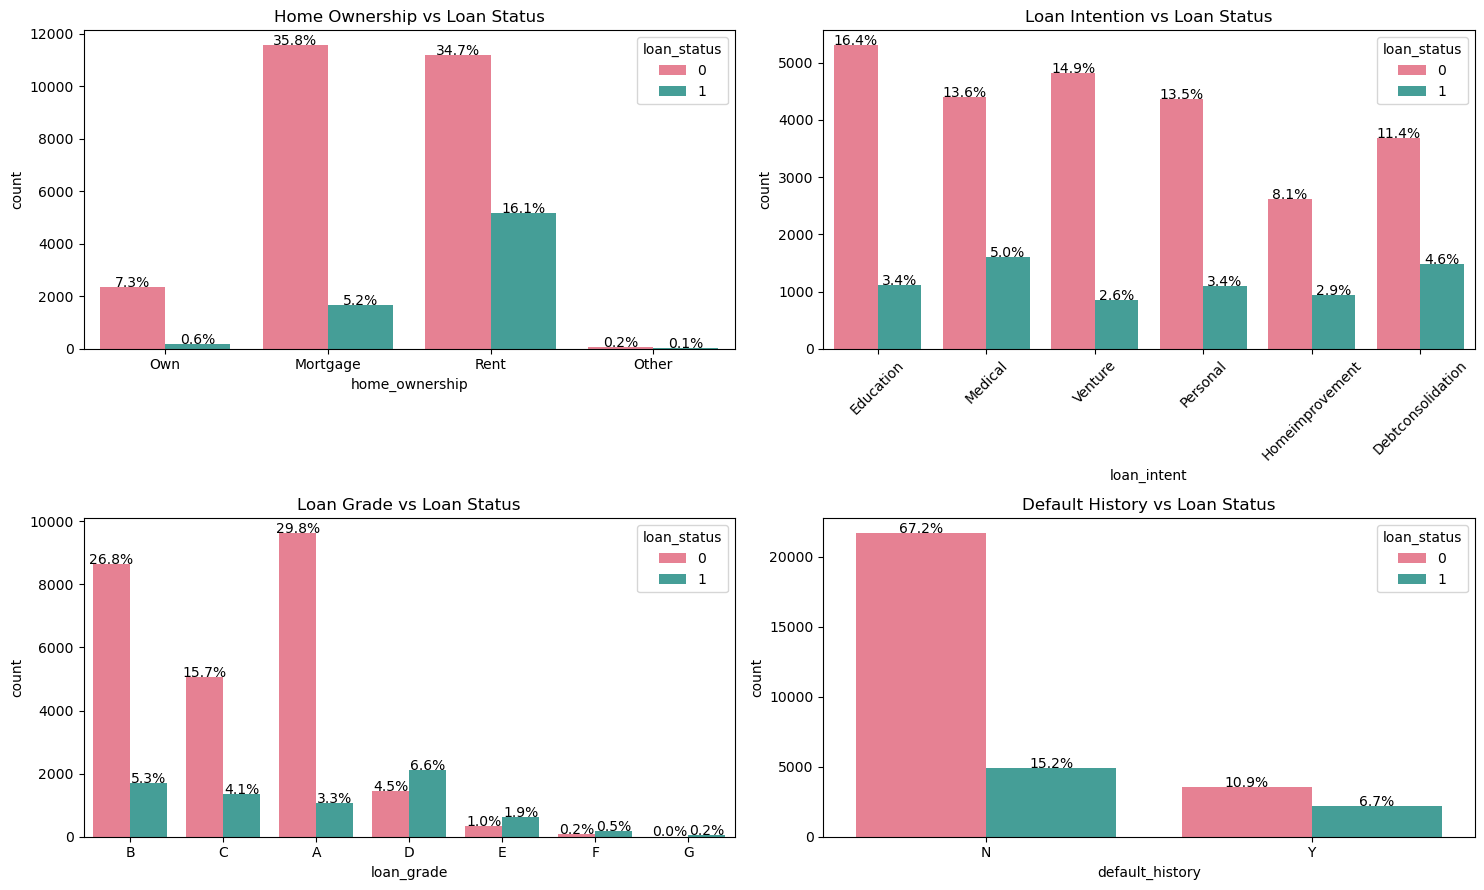

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))

sns.countplot(x='home_ownership', data=df, hue='loan_status', palette='husl', ax=axs[0, 0])
axs[0, 0].set_title('Home Ownership vs Loan Status')
total = len(df)
for p in axs[0, 0].patches:
    height = p.get_height()
    if height > 0:
        axs[0, 0].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='loan_intent', data=df, hue='loan_status', palette='husl', ax=axs[0, 1])
axs[0, 1].set_title('Loan Intention vs Loan Status')
axs[0, 1].tick_params(axis='x', rotation=45)
total = len(df)
for p in axs[0, 1].patches:
    height = p.get_height()
    if height > 0:
        axs[0, 1].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='loan_grade', data=df, hue='loan_status', palette='husl', ax=axs[1, 0])
axs[1, 0].set_title('Loan Grade vs Loan Status')
total = len(df)
for p in axs[1, 0].patches:
    height = p.get_height()
    if height > 0:
        axs[1, 0].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

sns.countplot(x='default_history', data=df, hue='loan_status', palette='husl', ax=axs[1, 1])
axs[1, 1].set_title('Default History vs Loan Status')
total = len(df)
for p in axs[1, 1].patches:
    height = p.get_height()
    if height > 0:
        axs[1, 1].text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.tight_layout()
plt.show()

In [55]:
rent_cust = df[df['home_ownership'] == 'Rent'] 
rent_default_cust = rent_cust[rent_cust['loan_status']==1] 
prob_rent_default = len(rent_default_cust)/len(rent_cust) #Probability
print(f'Probability of loan default in the case of Rent: {round(prob_rent_default*100,2)}')

mortgage_cust = df[df['home_ownership'] == 'Mortgage'] 
mortgage_default_cust = mortgage_cust[mortgage_cust['loan_status']==1] 
prob_mortgage_default = len(mortgage_default_cust)/len(mortgage_cust) #Probability
print(f'Probability of loan default in the case of Mortgage: {round(prob_mortgage_default*100,2)}')

Probability of loan default in the case of Rent: 31.64
Probability of loan default in the case of Mortgage: 12.58


#### Observations - 

1. Those borrowers who are living in rent are contributing 16% towards loan defaults. Borrowers living in Rent tends to contribute 2.5 times more than those who are having home in mortgage.
2. Borrowers with medical loans account for 5% of loan defaults, closely followed by those with debt consolidation loans at 4.6%. The differences in loan default rates among all loan intention types are minimal, indicating that defaulters can come from any loan intention category. Still we will review the default history for further reassurance.
3. Borrowers with loan grade 'D' are contributing by 6.6% towards loan defaults followed by loan grade 'B'. Interestingly borrowers with loan grade of 'F' and 'G' are contributing least, it could be possible to say that these categories are having less number of data with them.
4. Interestingly, borrower with no default history contributing more towards loan defaults in present. Need to analyze more in this area.

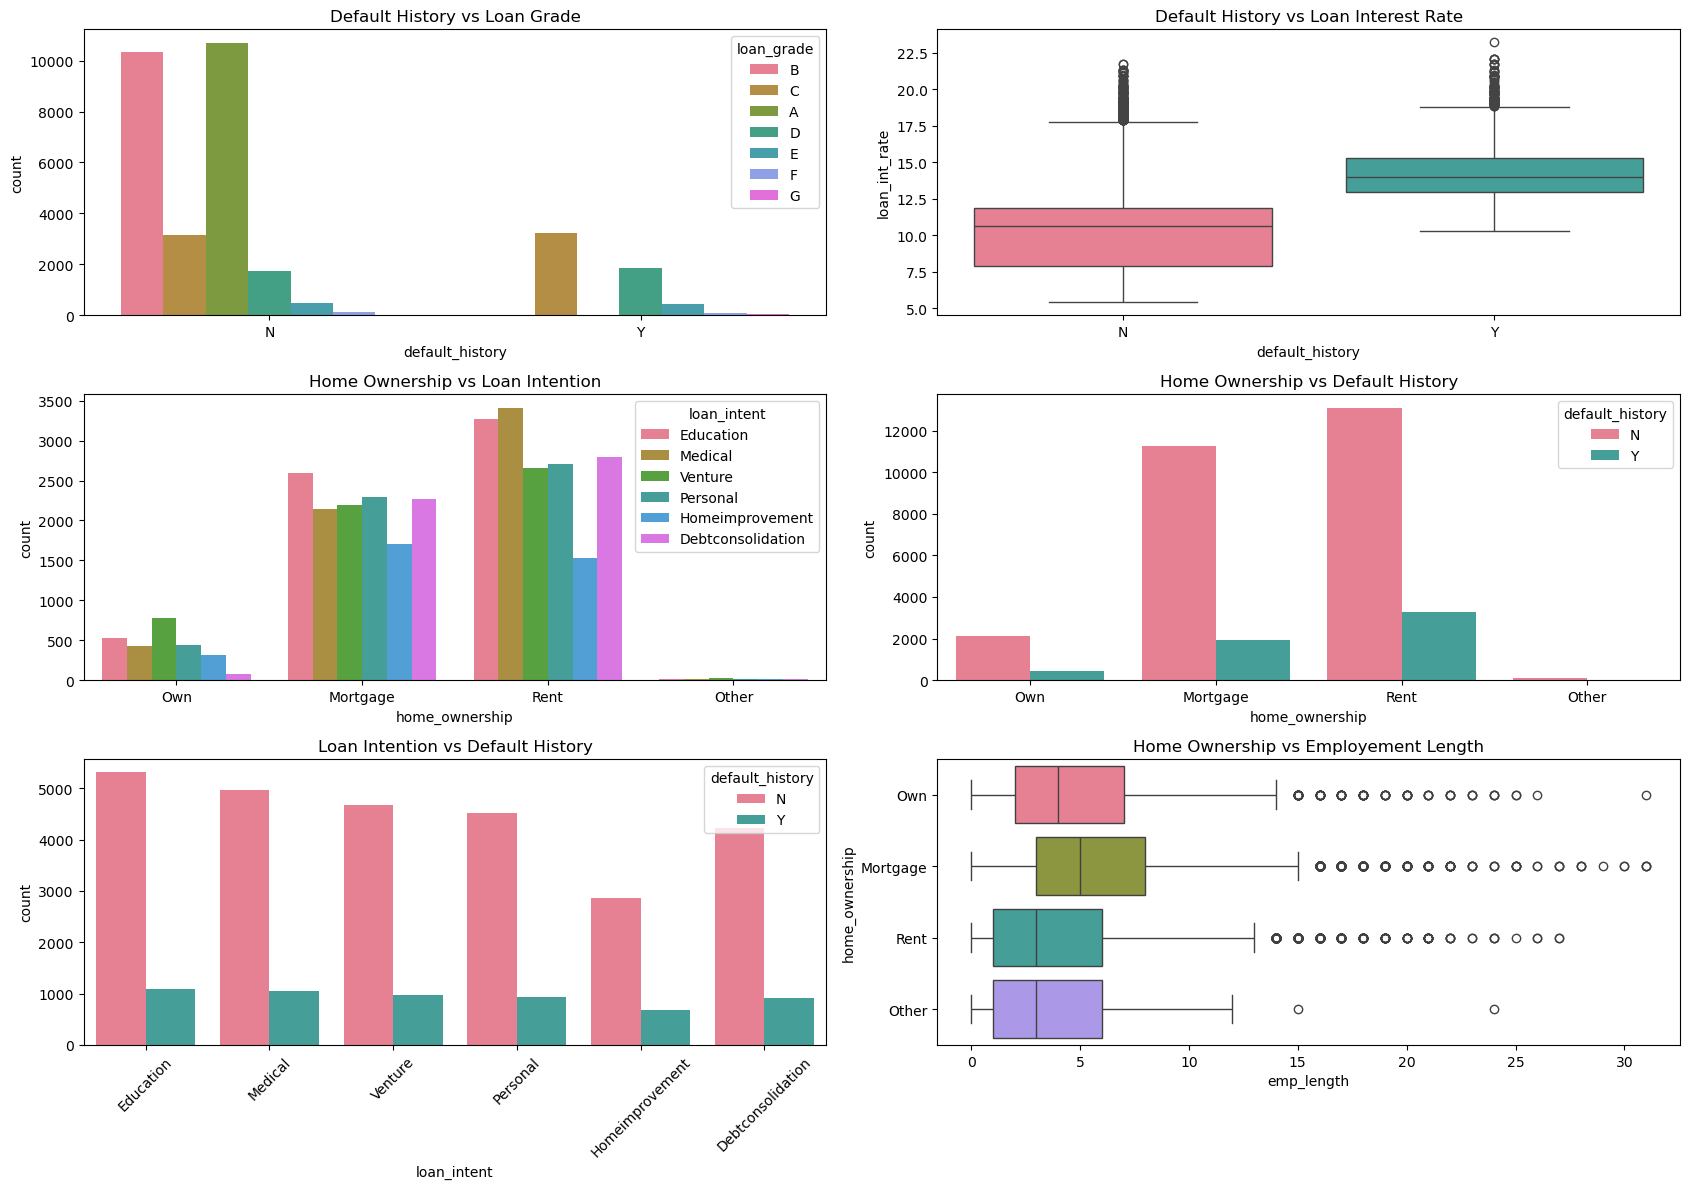

In [56]:
# Analysing default history with other columns where have shown maximum correlation
# Since loan grade and loan interest rate is having high correlation with default history, hence taken those for study
fig, axs = plt.subplots(3,2, figsize=(17,12))

sns.countplot(x='default_history', hue='loan_grade', data=df,palette='husl', ax=axs[0,0])
axs[0,0].set_title('Default History vs Loan Grade')

sns.boxplot(x='default_history', y='loan_int_rate', data=df, palette='husl', ax=axs[0,1])
axs[0,1].set_title('Default History vs Loan Interest Rate')

#Analysing relationship between home ownership and loan intention 
sns.countplot(x='home_ownership', hue='loan_intent', data=df,palette='husl', ax=axs[1,0])
axs[1,0].set_title('Home Ownership vs Loan Intention')

#Analysing home ownership with default history
sns.countplot(x='home_ownership', hue='default_history', data=df,palette='husl', ax=axs[1,1])
axs[1,1].set_title('Home Ownership vs Default History')

#Analysing Loan Intention with default history
sns.countplot(x='loan_intent', hue='default_history', data=df,palette='husl', ax=axs[2,0])
axs[2,0].set_title('Loan Intention vs Default History')
axs[2,0].tick_params(axis='x', rotation=45)

#Analysing Home ownership vs employement length
sns.boxplot(x='emp_length', y='home_ownership', data=df,palette='husl', ax=axs[2,1])
axs[2,1].set_title('Home Ownership vs Employement Length')

plt.tight_layout()
plt.show()

#### Observations - 

1. It can be seen that even though borrowers are having no default history, still they are getting grades from C to F. Due to many other factors, this is possible. Hence it is even possible to say that even though person is not having default history, person can still have other influential factors for contributing towards loan defaults at present. Also it could be seen that a strong positive relationship exists between default history and loan grade.
2. Default history can be seen majorly when loan interest rate is high, starting from 12.5%. Both are having outliers in the upper end. So it is possible to suggest that borrowers with high loan interest rates are more likely to default on their loans.
3. Home Ownership vs Loan Intention - 
   - Borrowers staying in Rent have taken higher medical loans followed by education loan.
   - Borrowers having home in mortgage have taken higher education loans.
   - Borrowers having their own home have referred to opt for loan for venture.
4. It can be seen again that people's staying in rent followed by mortgage are majorly contributing even in default history.
5. Once again, it is evident that defaulters can come from any loan intention category. The likelihood of loan defaults is equally possible across all loan intention types, regardless of a person's default status.
6. Borrowers having less than 10 years experience is having slight edge over other home preferences but the difference is quite small.

### Loan Status and All Numerical Columns

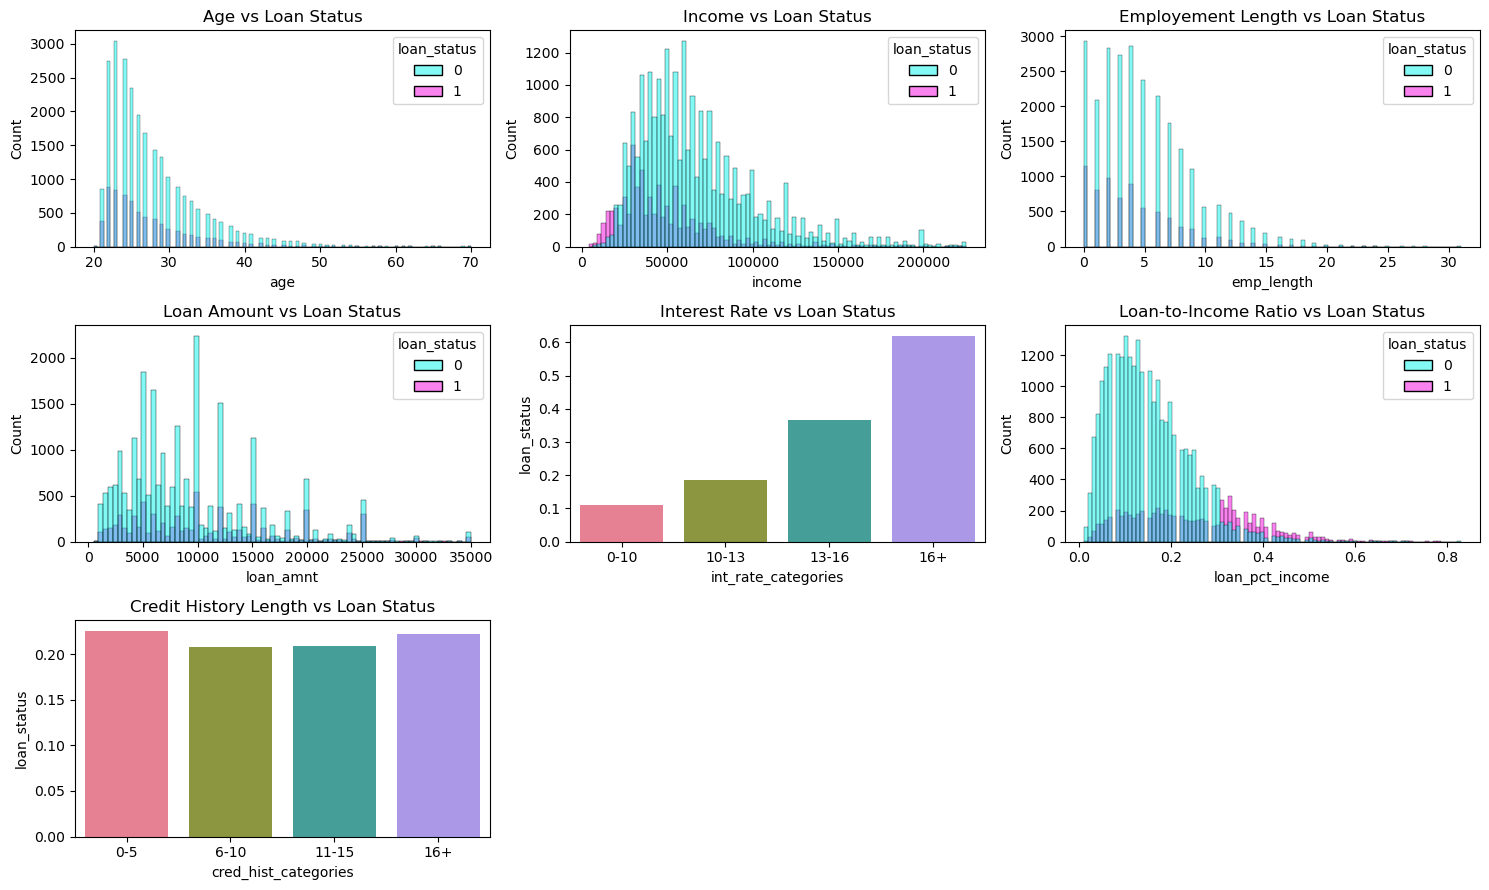

In [57]:
fig, axs = plt.subplots(3,3, figsize=(15,9))

custom_palette = ['#07f5ed', '#f507e1']
sns.histplot(x='age', hue='loan_status', data=df, ax=axs[0,0], palette=custom_palette)
axs[0,0].set_title('Age vs Loan Status')

sns.histplot(x='income', hue='loan_status', data=df, ax=axs[0,1], palette=custom_palette)
axs[0,1].set_title('Income vs Loan Status')

sns.histplot(x='emp_length', hue='loan_status', data=df, ax=axs[0,2], palette=custom_palette)
axs[0,2].set_title('Employement Length vs Loan Status')

sns.histplot(x='loan_amnt', hue='loan_status', data=df, ax=axs[1,0], palette=custom_palette)
axs[1,0].set_title('Loan Amount vs Loan Status')

df['int_rate_categories']=pd.cut(df['loan_int_rate'],[0,10,13,16,20],labels=['0-10','10-13','13-16','16+'])
sns.barplot(x='int_rate_categories', y='loan_status', data=df, ax=axs[1,1], palette='husl', ci=None)
axs[1,1].set_title('Interest Rate vs Loan Status')

sns.histplot(x='loan_pct_income', hue='loan_status', data=df, ax=axs[1,2], palette=custom_palette)
axs[1,2].set_title('Loan-to-Income Ratio vs Loan Status')

df['cred_hist_categories']=pd.cut(df['cred_hist_length'],[0,5,10,15,float('inf')],labels=['0-5','6-10','11-15','16+'])
sns.barplot(x='cred_hist_categories', y='loan_status', data=df, ax=axs[2,0], palette='husl', ci=None)
axs[2,0].set_title('Credit History Length vs Loan Status')

axs[2,1].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()

#### Observation - 

1. Borrowers aged 20-30 have the highest loan default rates. Age and loan status are negatively correlated,so when age increases so defaults decreases.
2. Income range 0-25000 has high chances of loan defaults. As income increases, defaults started decreasing, since both are negatively correlated with each other.
3. Borrowers with no employement or less than year experience having more chance to do loan defaults. It makes sense as with less or no experience they don't have source of income to repay loan.
4. Chances of loan defaults is quite high around 0-10000. However, defaults also occur frequently with higher loan amounts, making it evident that the risk of default is nearly equal for all loan amounts.
5. Interest rates which are less than 10% are having very less chance of loan defaults. Loan defaults increases when interest rates increases. It is being seen before in default history also, the interest rates of more than 10% are having loan defaulters.
6. Loan to income ratio of 0.3 to 0.4 is having high loan defaults. Hence, when ratio increase defaults also increases which is quite obvious. This is because a higher ratio indicates that the borrower has less income available to cover the loan, making defaults more likely.
7. All credit history lengths have an equal chance of resulting in loan defaults.

### Loan Interest Rate and Other Important Columns

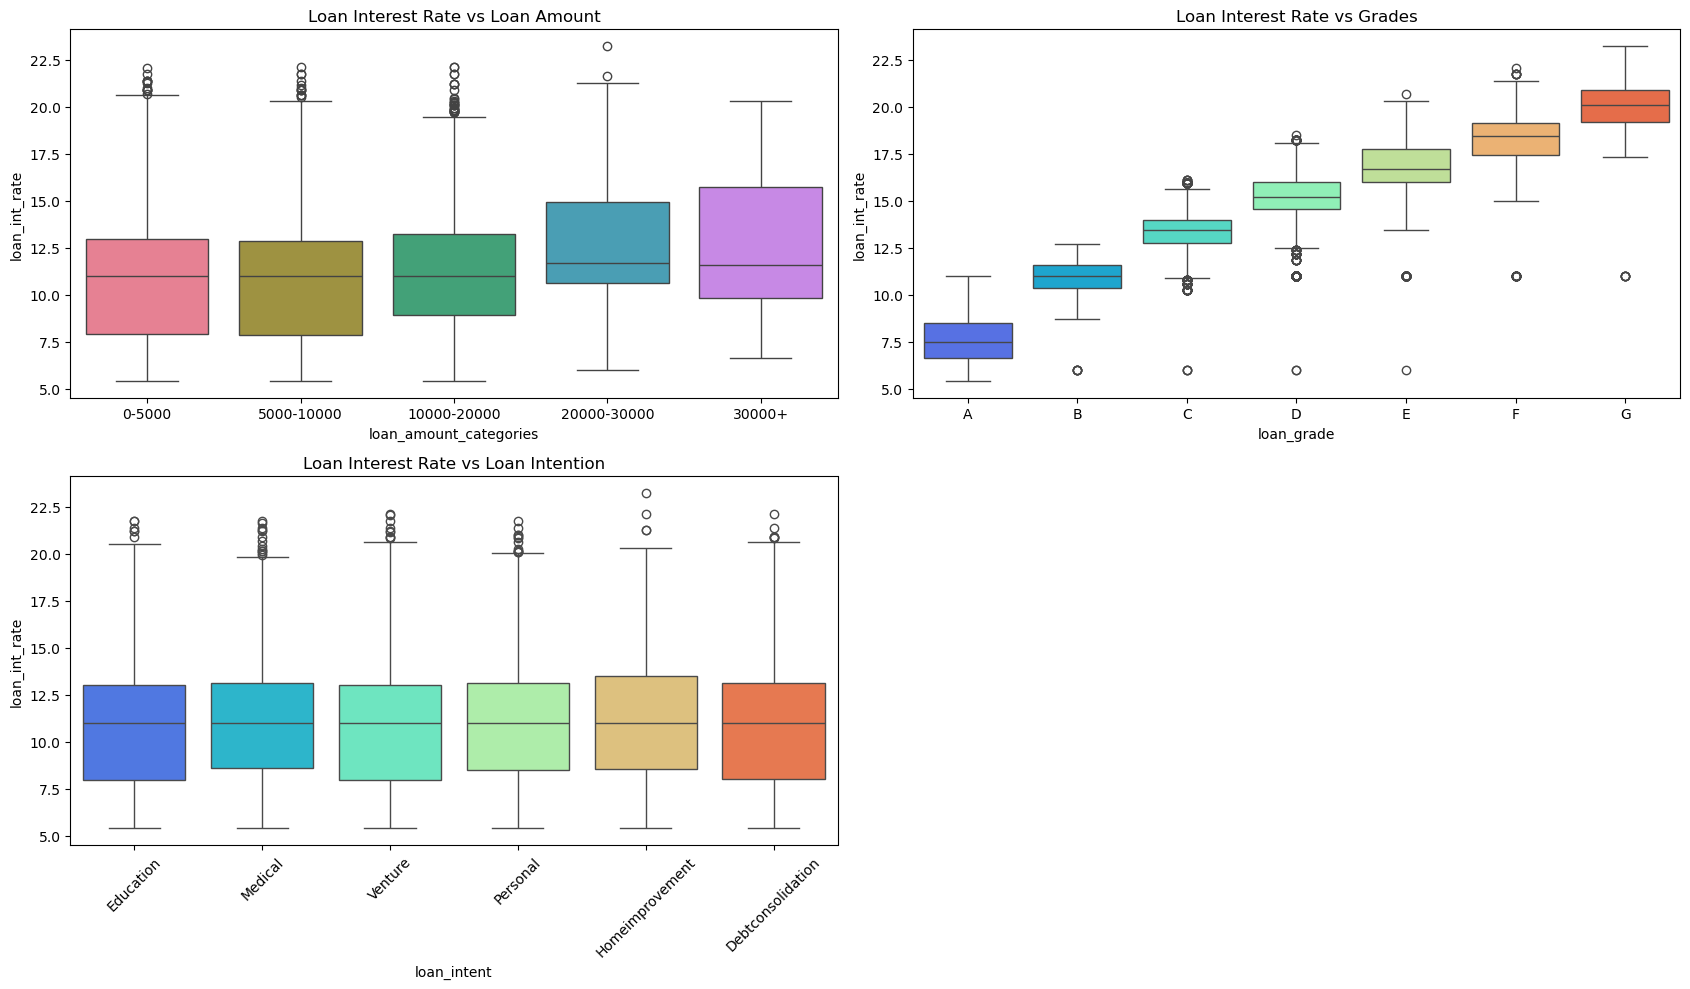

In [58]:
fig, axs = plt.subplots(2,2, figsize=(17,10))

df['loan_amount_categories'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 20000, 30000, float('inf')], labels=['0-5000', '5000-10000', '10000-20000', '20000-30000', '30000+'])
sns.boxplot(x='loan_amount_categories', y='loan_int_rate', data=df, palette='husl', ax=axs[0,0])
axs[0,0].set_title('Loan Interest Rate vs Loan Amount')

sns.boxplot(y='loan_int_rate', x='loan_grade', data = df,palette='rainbow', order = 'ABCDEFG', ax=axs[0,1])
axs[0,1].set_title('Loan Interest Rate vs Grades')

sns.boxplot(y='loan_int_rate', x='loan_intent', data = df, palette='rainbow', ax=axs[1,0])
axs[1,0].set_title('Loan Interest Rate vs Loan Intention')
axs[1,0].tick_params(axis='x', rotation=45)

axs[1,1].set_visible(False)
plt.tight_layout()
plt.show()

#### Observations - 

1. It is clear that as loan amount increases interest rate is also increases.
2. Loan Interest Rate vs Grades
    - When interest rate is less than 10, borrowers are getting A grade.
    - Higher the borrower's credit grade, lower interest rate offered to the borrower by lender.
    - With increasing in interest, grade is substantially increasing from A to F.
3. Loan Interest Rate vs Loan Intention
   
    - It is quite clear that average interest rate for all loan purpose is approximately equal.    - Range of interest rate is almost equal in all loan intentions. 

### Income and Other Important Columns

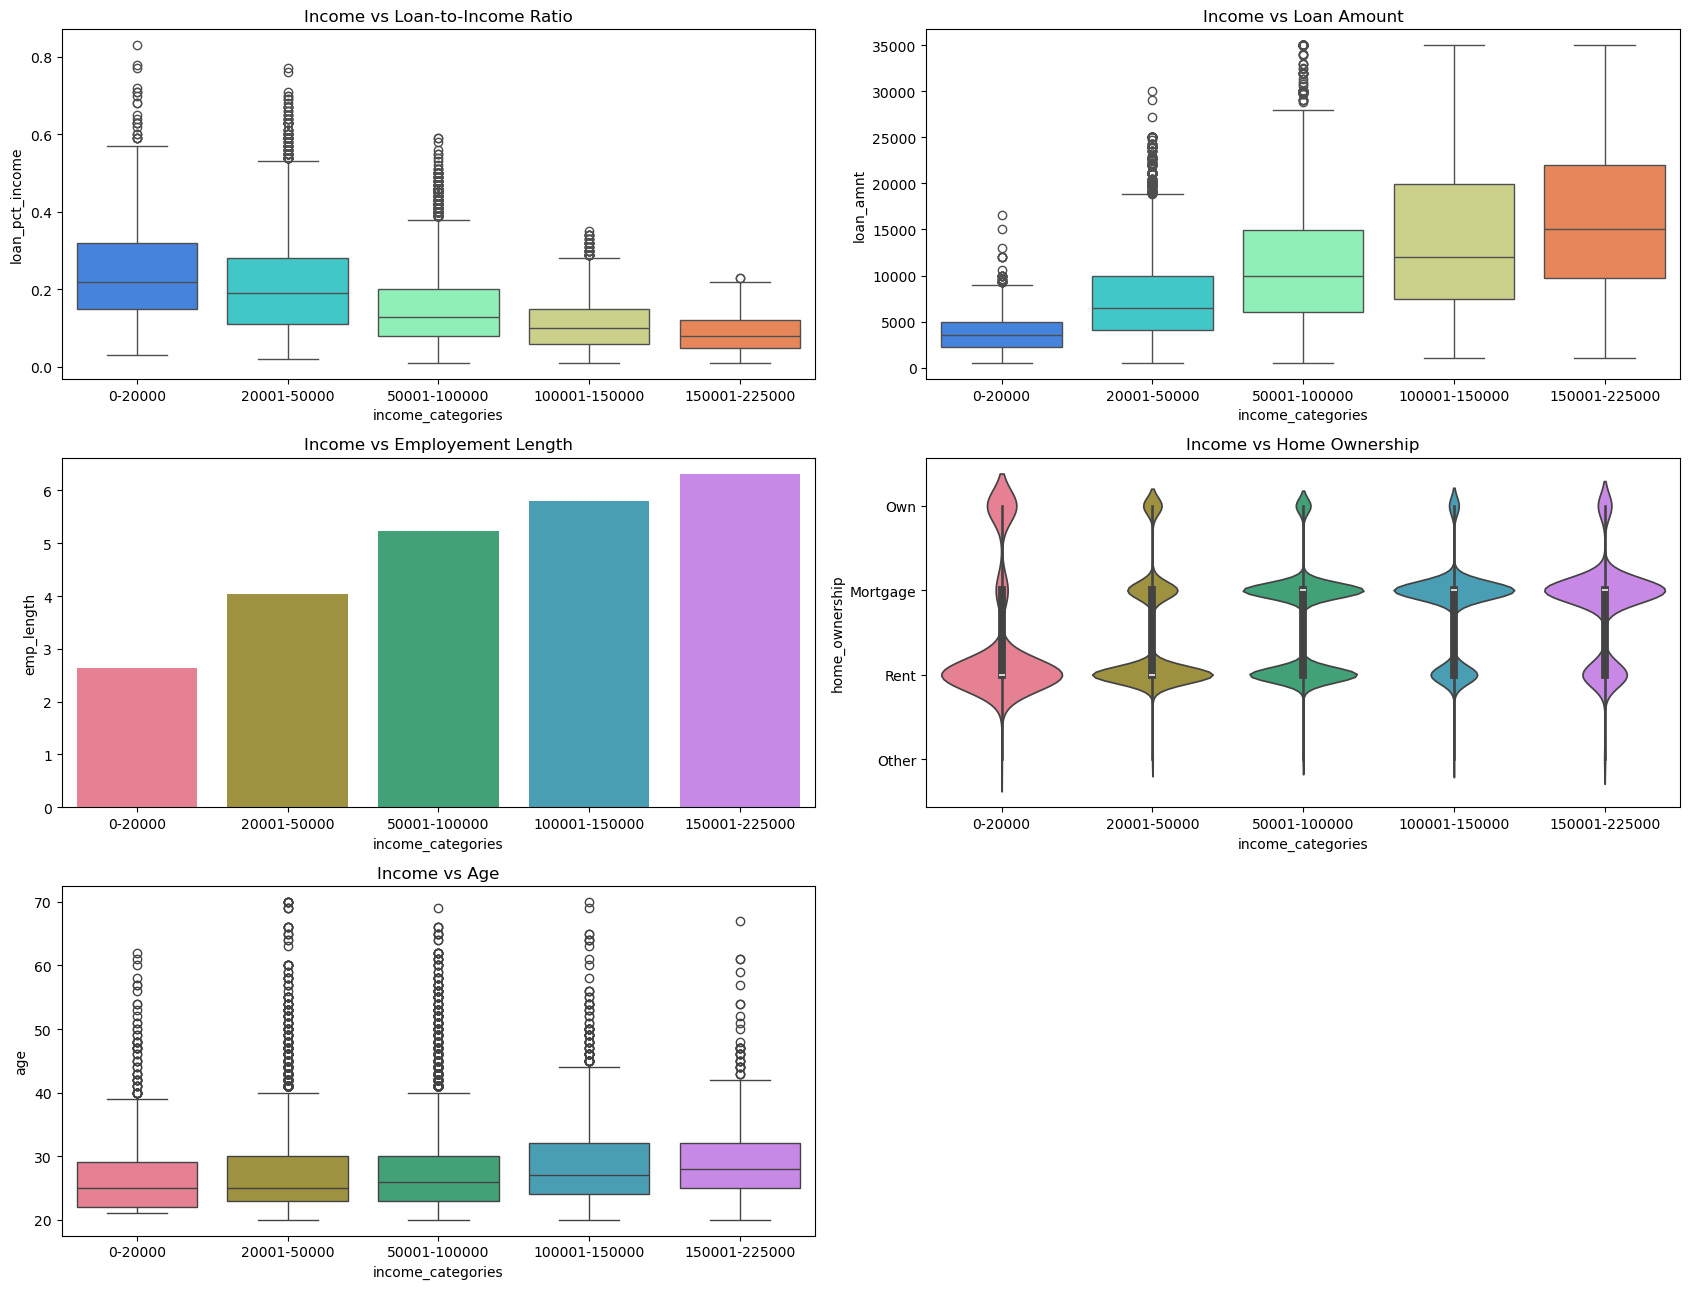

In [59]:
fig, axs = plt.subplots(3,2, figsize=(17,13))

df['income_categories'] = pd.cut(df['income'], bins=[0, 20000, 50000, 100000, 150000, 225000], labels=['0-20000', '20001-50000', '50001-100000', '100001-150000', '150001-225000'])
sns.boxplot(x='income_categories', y='loan_pct_income', data=df, palette='rainbow', ax=axs[0,0])
axs[0,0].set_title('Income vs Loan-to-Income Ratio')

sns.boxplot(x='income_categories', y='loan_amnt', data=df, palette='rainbow', ax=axs[0,1])
axs[0,1].set_title('Income vs Loan Amount')

sns.barplot(x='income_categories', y='emp_length', data=df, ax=axs[1,0], palette='husl', ci=None)
axs[1,0].set_title('Income vs Employement Length')

sns.violinplot(x='income_categories', y='home_ownership', data=df, ax=axs[1,1], palette='husl')
axs[1,1].set_title('Income vs Home Ownership')

sns.boxplot(x='income_categories', y='age', data=df, ax=axs[2,0], palette='husl')
axs[2,0].set_title('Income vs Age')

axs[2,1].set_visible(False)

plt.tight_layout()
plt.show()

#### Observations - 

1. As income increases, loan-to-income ratio started decreasing, which is quite obvious also because a person with having higher incomes can easily afford loans and also chances of loan defaults will be very less.
2. As income increase, loan amount also increases. Borrowers with medium income range are also taking higher loans.
3. As borrowers gain more experience, they typically see an increase in income, which is a natural progression.
4. Borrowers with an income range of 0-20,000 tends to live in a rent, while those with higher incomes increasingly opt for mortgage homes.
5. For all income groups, majority age range is 20-30. Outliers are present in the upper side.

### Loan Amount vs Other Important Columns

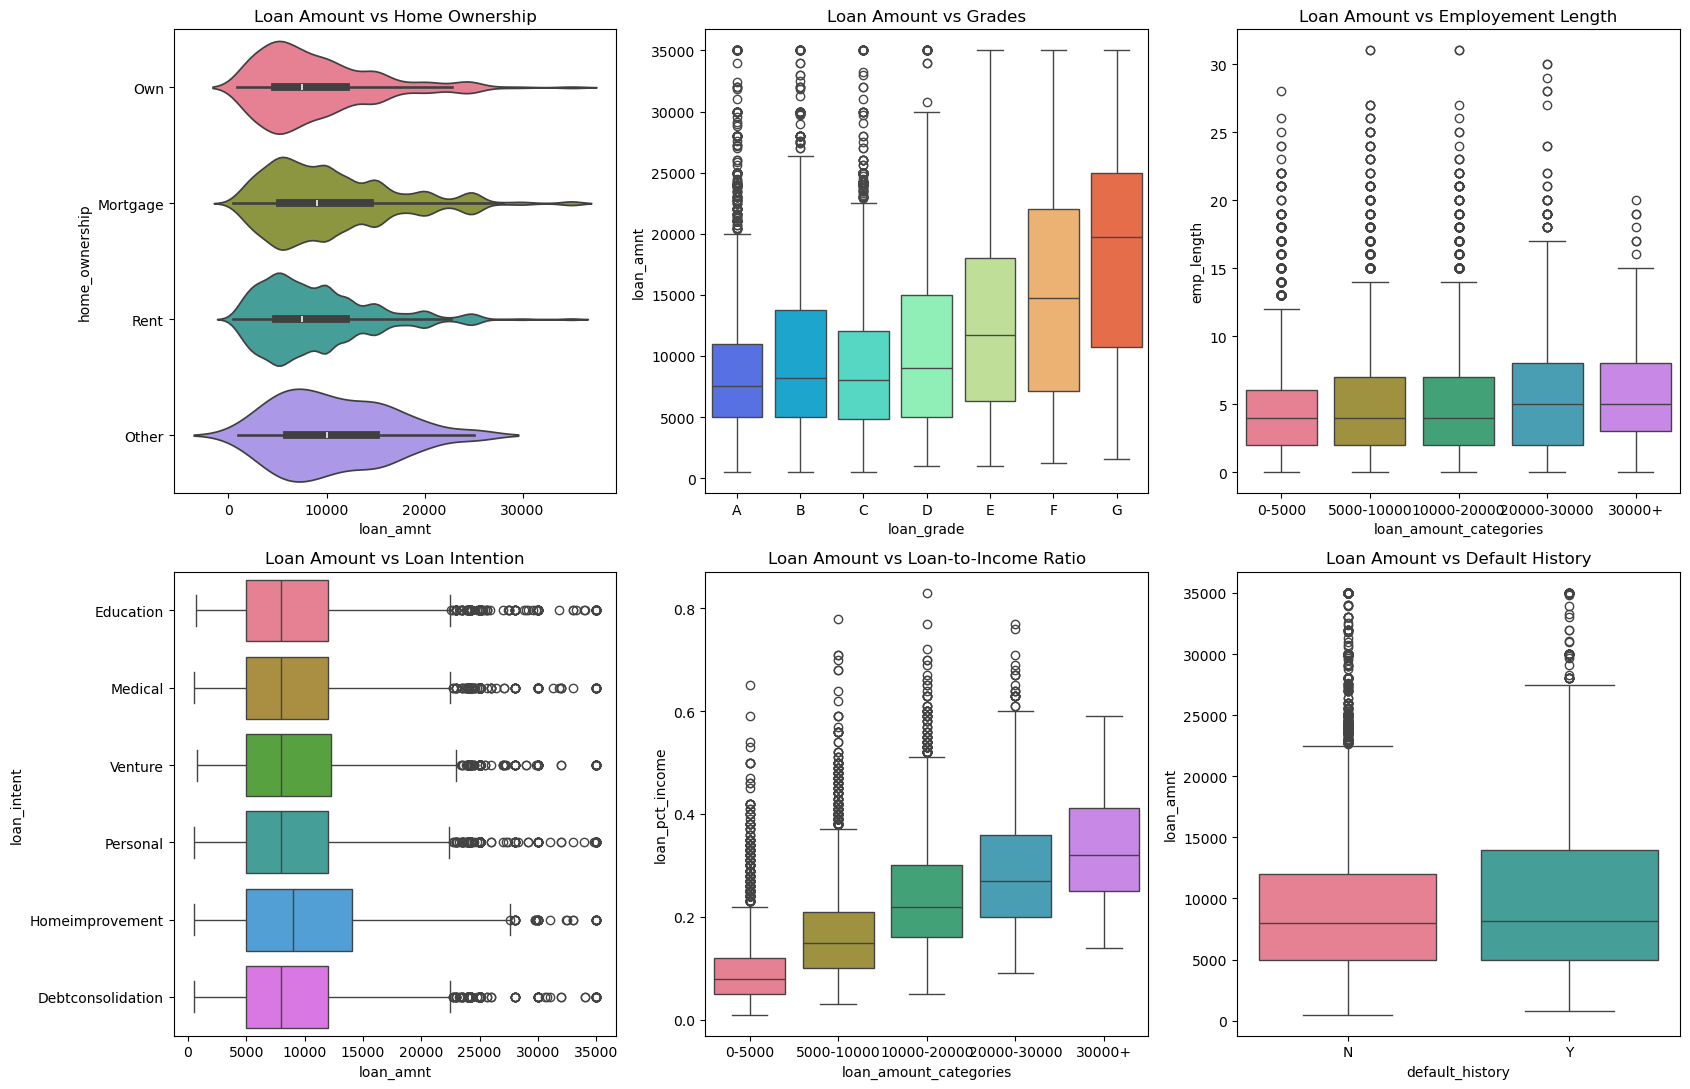

In [60]:
fig, axs = plt.subplots(2,3, figsize=(17,11))

df['loan_amount_categories'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 20000, 30000, float('inf')], labels=['0-5000', '5000-10000', '10000-20000', '20000-30000', '30000+'])
sns.violinplot(x='loan_amnt', y='home_ownership', data=df, ax=axs[0,0], palette='husl')
axs[0,0].set_title('Loan Amount vs Home Ownership')

sns.boxplot(y='loan_amnt', x='loan_grade', data = df,palette='rainbow', order = 'ABCDEFG', ax=axs[0,1])
axs[0,1].set_title('Loan Amount vs Grades')

sns.boxplot(x='loan_amount_categories', y='emp_length', data = df,palette='husl', ax=axs[0,2])
axs[0,2].set_title('Loan Amount vs Employement Length')

sns.boxplot(x='loan_amnt', y='loan_intent', data=df, ax=axs[1,0], palette='husl')
axs[1,0].set_title('Loan Amount vs Loan Intention')

sns.boxplot(x='loan_amount_categories', y='loan_pct_income', data=df, ax=axs[1,1], palette='husl')
axs[1,1].set_title('Loan Amount vs Loan-to-Income Ratio')

sns.boxplot(x='default_history', y='loan_amnt', data=df, ax=axs[1,2], palette='husl')
axs[1,2].set_title('Loan Amount vs Default History')

plt.tight_layout()
plt.show()

#### Observations - 

1. Most borrowers take out loans of less than 20000, regardless of home ownership.2. Loan amounts increase from grade A to G, indicating borrowers with worse grades take higher average loans.
3. Loan amount is almost equally distributed when borrower's years of experience is less than 10. Outliers is present in the upper side.
4. Loan amount taken for any purpose is majorly less than 15000 and also almost equally distributed. Outliers are present in upper side.
5. As loan amount increase then loan-to-income ratio also started increasing.
6. Default history can be seen majorly within the loan amount of range of less than 15000. Although the difference is quite small as compared with no default history.





### Age vs Other Important Columns

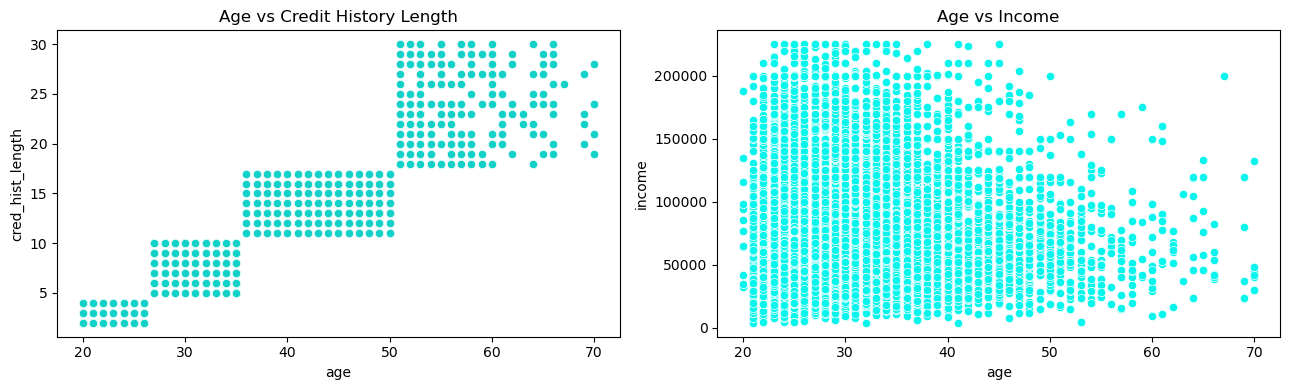

In [61]:
fig, axs = plt.subplots(1,2, figsize=(13,4))

sns.scatterplot(x='age', y='cred_hist_length', data=df,color='#13d1c8', ax=axs[0])
axs[0].set_title('Age vs Credit History Length')

sns.scatterplot(x='age', y='income',color='#07f5ed', data=df, ax=axs[1])
axs[1].set_title('Age vs Income')

plt.tight_layout()
plt.show()

#### Observations - 

1. Credit history and age is having strong positive correlation. As age increases, credit history length also increases. Younger borrowers are having very less credit history in years comparatively older borrowers are having higher credit history.
2. Younger to mid aged borrower's income is fluctuating till maximum range but it started decreasing when the age is more than 40.

## Multivariate Analysis

<Axes: xlabel='loan_int_rate', ylabel='loan_pct_income'>

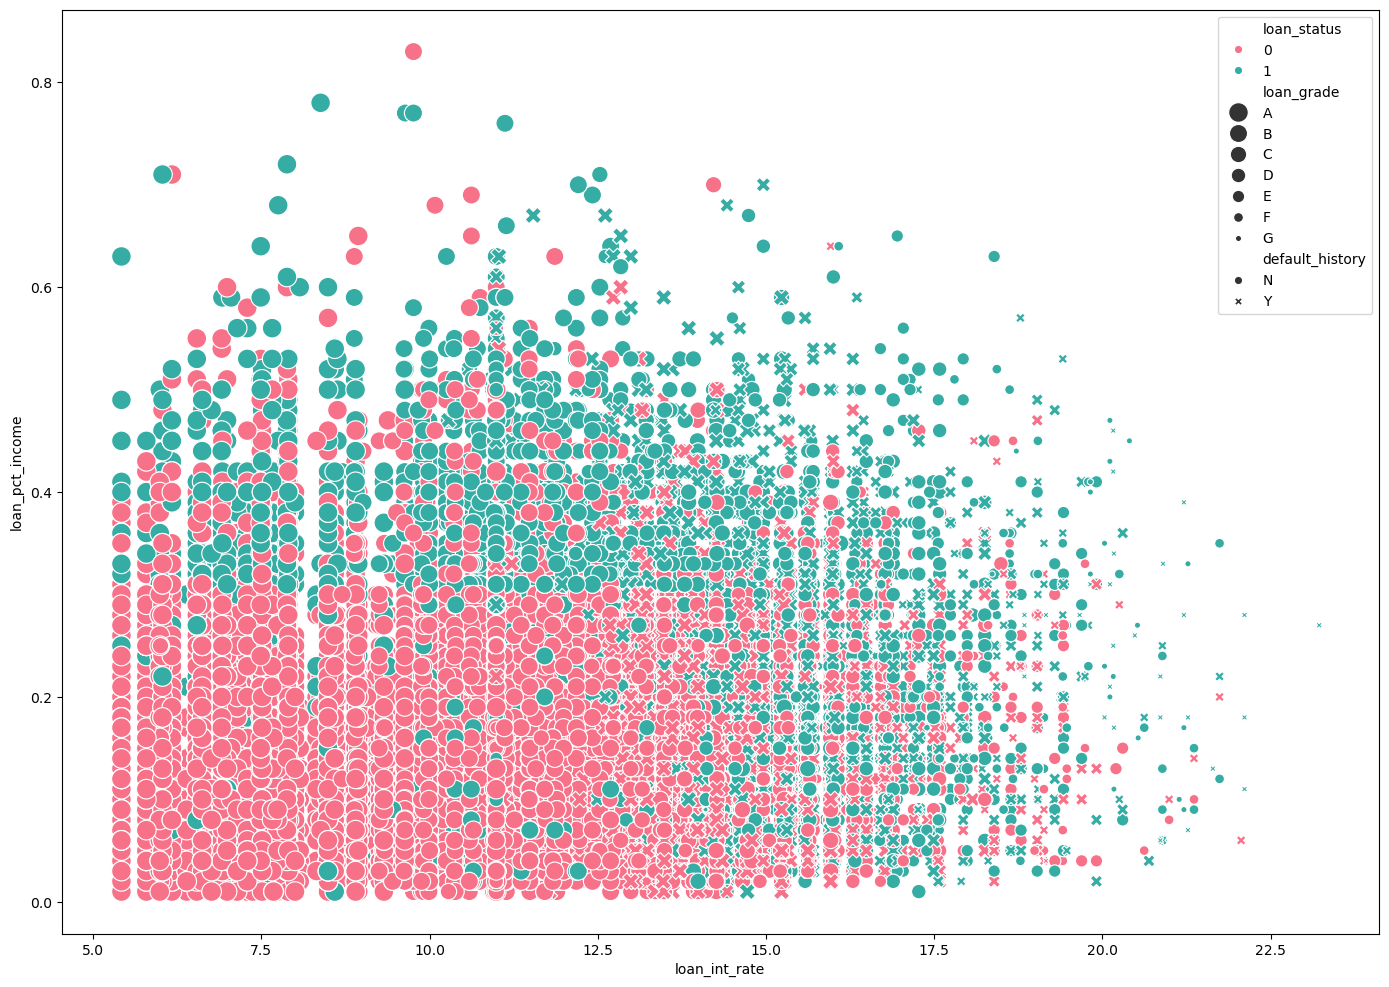

In [62]:
plt.figure(figsize=(17,12))
sns.scatterplot(x='loan_int_rate', y='loan_pct_income', hue='loan_status', style='default_history', size='loan_grade',size_order='ABCDEFG', data=df, palette='husl', sizes=(20, 200))

#### Observations - 

Loan defaults are more common in regions where the interest rate exceeds 10%, the loan-to-income ratio is above 0.3, and the loan grades are poor. The default history also supports this pattern. Therefore, individuals with an interest rate higher than 10%, a loan-to-income ratio greater than 30%, and poor grades are more likely to default on their loans.

<Axes: xlabel='loan_amnt', ylabel='loan_pct_income'>

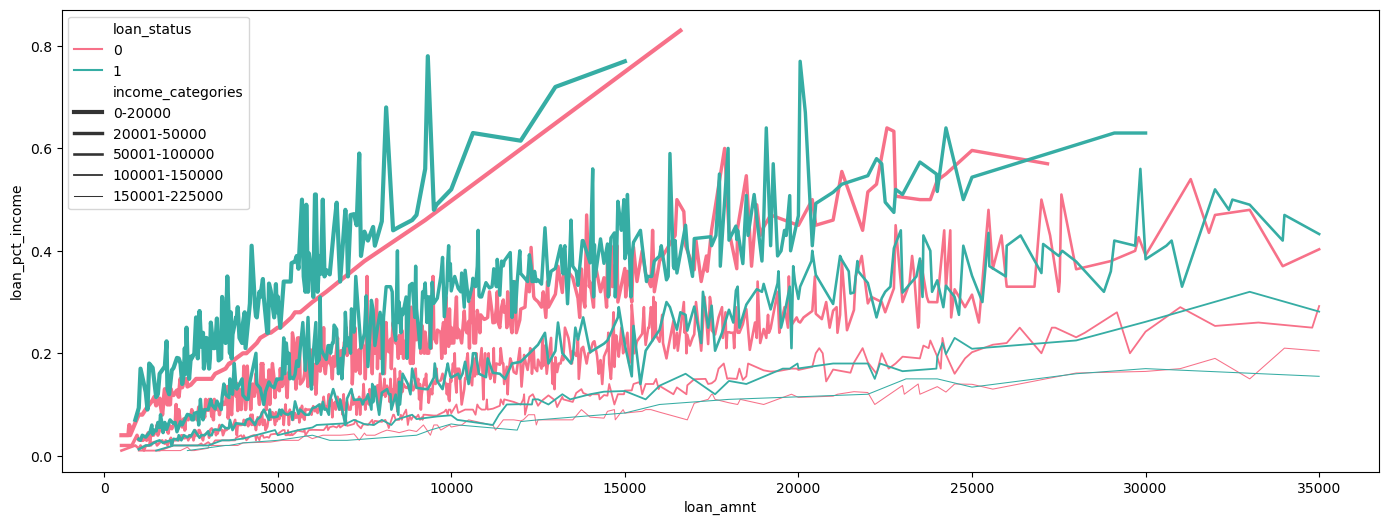

In [63]:
plt.figure(figsize=(17,6))
sns.lineplot(x=df['loan_amnt'], y=df['loan_pct_income'],hue='loan_status', size='income_categories', data=df, palette='husl', ci=None)

#### Observations - 

Borrowers with lower incomes (below 50000), smaller loan amounts (under 20000), and a high or rising loan-to-income ratio are at a significantly greater risk of defaulting on their loans.

In [64]:
#Droping all the extra created categories

df = df.drop(['int_rate_categories','cred_hist_categories','loan_amount_categories','income_categories'], axis=1)

In [65]:
df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
0,21,9600,Own,5,Education,B,1000,11.14,0.10,N,2,0
1,25,9600,Mortgage,1,Medical,C,5500,12.87,0.57,N,3,1
2,23,65500,Rent,4,Medical,C,35000,15.23,0.53,N,2,1
3,24,54400,Rent,8,Medical,C,35000,14.27,0.55,Y,4,1
4,21,9900,Own,2,Venture,A,2500,7.14,0.25,N,2,1


## Conclusion -

1. Majority of the borrowers are younger peoples within the age group of 20-30.
2. Average income of the borrowers is around 62000. 90% of the borrowers are having income which is below than 130000.
3. 51% of the borrowers are staying in rent, 41% are having their home in mortgage whereas only 8% borrowers are having their own home.
4. Borrowers with 0-5 years range of employee length could be seen heavily. 90% of the borrowers are having employement length less than 10 years. Also it could be seen that many borrowers are having no employement years history.
5. 20% of the borrowers are opting loan for Educational purpose followed by Medical and Venture. But the differences are minimal.
6. **Those borrowers who are living in rent are contributing 16% towards loan defaults.** Borrowers living in Rent tends to contribute **2.5 times** more than those who are having home in mortgage.
7. Borrowers with medical loans account for 5% of loan defaults, closely followed by those with debt consolidation loans at 4.6%. The differences in **loan default rates among all loan intention types are minimal, indicating that defaulters can come from any loan intention category**.
8. Default history can be seen majorly when loan interest rate is high, starting from 12.5%.
9. **Borrowers aged 20-30 have the highest loan default rates.** Age and loan status are negatively correlated,so when age increases so defaults decreases.
10. **Income range 0-25000 has high chances of loan defaults.** As income increases, defaults started decreasing, since both are negatively correlated with each other.
11. **Borrowers with no employement or less than year experience having more chance to do loan defaults**. It makes sense as with less or no experience they don't have source of income to repay loan.
12. **Chances of loan defaults is quite high around 0-10000 loan amount.** However, defaults also occur frequently with higher loan amounts, making it evident that the risk of default is nearly equal for all loan amounts.
13. Interest rates which are more than 10% are having very less chance of loan defaults. Loan defaults increases when interest rates increases. It is being seen before in default history also, the **interest rates of more than 10% are having loan default.**
14. **As income increase, loan amount also increases.** Borrowers with medium income range are also taking higher loans.
15. **As income increases, loan-to-income ratio started decreasing**, which is quite obvious also because a person with having higher incomes can easily afford loans and also chances of loan defaults will be very less.
16. All credit history lengths have an equal chance of resulting in loan defaults.
17. It can be seen that even though borrowers are having no default history, still they are getting grades from C to F. Due to many other factors, this is possible. Hence it is even possible to say that even though person is not having default history, person can still have other influential factors for contributing towards loan defaults at present. Also it could be seen that a **strong positive relationship exists between default history and loan grade.**
18. Interest rate and grades are having very strong positive correlation. **With increasing in interest, grade is substantially increasing from A to F.**
19. It can be seen again that people's staying in rent followed by mortgage are majorly contributing even in default history.
20. **Borrowers with an income range of 0-20,000 tends to live in a rent**, while those with higher incomes increasingly opt for mortgage homes.
21. Loan amounts increase from grade A to G, indicating borrowers with worse grades take higher average loans.
22. **Credit history and age is having strong positive correlation.** As age increases, credit history length also increases. Younger borrowers are having very less credit history in years comparatively older borrowers are having higher credit history.
23. Loan defaults are more common in regions where the interest rate exceeds 10%, the loan-to-income ratio is above 0.3, and the loan grades are poor. The default history also supports this pattern. Therefore, **individuals with an interest rate higher than 10%, a loan-to-income ratio greater than 30%, and poor grades are more likely to default on their loans.**
24. **Borrowers with lower incomes (below 50000), smaller loan amounts (under 20000), and a high or rising loan-to-income ratio are at a significantly greater risk of defaulting on their loans.**
25. It could be seen that all the features are playing important role and contributing towards loan defaults.

## Data Preprocessing

In [66]:
df.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length,loan_status
0,21,9600,Own,5,Education,B,1000,11.14,0.10,N,2,0
1,25,9600,Mortgage,1,Medical,C,5500,12.87,0.57,N,3,1
2,23,65500,Rent,4,Medical,C,35000,15.23,0.53,N,2,1
3,24,54400,Rent,8,Medical,C,35000,14.27,0.55,Y,4,1
4,21,9900,Own,2,Venture,A,2500,7.14,0.25,N,2,1


## Segregating input columns and target column

In [67]:
y = df['loan_status']
x = df.drop('loan_status', axis=1)

In [68]:
x.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length
0,21,9600,Own,5,Education,B,1000,11.14,0.10,N,2
1,25,9600,Mortgage,1,Medical,C,5500,12.87,0.57,N,3
2,23,65500,Rent,4,Medical,C,35000,15.23,0.53,N,2
3,24,54400,Rent,8,Medical,C,35000,14.27,0.55,Y,4
4,21,9900,Own,2,Venture,A,2500,7.14,0.25,N,2


In [69]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Spliting the data into train & test

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.75, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(24180, 11) (24180,)
(8060, 11) (8060,)


## Separating Categorical and Numerical columns form x_train data

In [71]:
x_train.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_pct_income,default_history,cred_hist_length
15648,24,154000,Mortgage,8,Debtconsolidation,A,6000,5.79,0.04,N,4
18209,28,20000,Mortgage,0,Homeimprovement,A,5000,8.59,0.25,N,7
26393,33,79050,Mortgage,17,Medical,D,12750,15.95,0.14,N,10
11903,23,78000,Mortgage,0,Medical,A,10000,6.62,0.13,N,2
1640,23,18600,Rent,2,Debtconsolidation,B,1700,9.99,0.09,N,3


In [72]:
x_train_cat = x_train.select_dtypes(include='object')
x_train_cat.head()

,home_ownership,loan_intent,loan_grade,default_history
15648,Mortgage,Debtconsolidation,A,N
18209,Mortgage,Homeimprovement,A,N
26393,Mortgage,Medical,D,N
11903,Mortgage,Medical,A,N
1640,Rent,Debtconsolidation,B,N


In [73]:
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length
15648,24,154000,8,6000,5.79,0.04,4
18209,28,20000,0,5000,8.59,0.25,7
26393,33,79050,17,12750,15.95,0.14,10
11903,23,78000,0,10000,6.62,0.13,2
1640,23,18600,2,1700,9.99,0.09,3


In [74]:
##Segerating categorical columns for different encoding purpose - separating grade column as it is following ordinality

x_train_cat_nominal = x_train_cat.drop('loan_grade', axis=1)
x_train_cat_ordinal = x_train_cat[['loan_grade']]

In [75]:
x_train_cat_nominal.head()

,home_ownership,loan_intent,default_history
15648,Mortgage,Debtconsolidation,N
18209,Mortgage,Homeimprovement,N
26393,Mortgage,Medical,N
11903,Mortgage,Medical,N
1640,Rent,Debtconsolidation,N


In [76]:
x_train_cat_ordinal.head()

,loan_grade
15648,A
18209,A
26393,D
11903,A
1640,B


### i) Scalling numerical column

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                         columns = x_train_num.columns,
                                         index = x_train_num.index)

x_train_num_rescaled.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length
15648,-0.596947,2.666404,0.827936,-0.560863,-1.689300,-1.230432,-0.442122
18209,0.048784,-1.241828,-1.200510,-0.721545,-0.780972,0.736366,0.300292
26393,0.855947,0.480419,3.109938,0.523744,1.606633,-0.293861,1.042705
11903,-0.758380,0.449795,-1.200510,0.081867,-1.420045,-0.387519,-0.937064
1640,-0.758380,-1.282660,-0.693399,-1.251798,-0.326808,-0.762147,-0.689593


### ii) Applying OneHotEncoder to Nominal Categorical column

In [78]:
x_train_cat_nominal.head()

,home_ownership,loan_intent,default_history
15648,Mortgage,Debtconsolidation,N
18209,Mortgage,Homeimprovement,N
26393,Mortgage,Medical,N
11903,Mortgage,Medical,N
1640,Rent,Debtconsolidation,N


In [79]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

x_train_cat_ohe = pd.DataFrame(encoder.fit_transform(x_train_cat_nominal),
                              columns = encoder.get_feature_names_out(x_train_cat_nominal.columns),
                              index = x_train_cat_nominal.index)

x_train_cat_ohe.head()

,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y
15648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18209,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26393,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
encoder.categories_

[array(['Mortgage', 'Other', 'Own', 'Rent'], dtype=object),
 array(['Debtconsolidation', 'Education', 'Homeimprovement', 'Medical',
        'Personal', 'Venture'], dtype=object),
 array(['N', 'Y'], dtype=object)]

### iii) Applying Label Encoding to Ordinal Categorical column 

In [81]:
x_train_cat_le = pd.DataFrame(index=x_train_cat.index)
x_train_cat_le.head()

""
15648
18209
26393
11903
1640


In [82]:
x_train_cat.loan_grade.unique()

array(['A', 'D', 'B', 'C', 'E', 'F', 'G'], dtype=object)

In [83]:
cut_encoder = {'G':1, 'F':2, 'E':3, 'D':4, 'C':5, 'B':6, 'A':7}

x_train_cat_le['loan_grade'] = x_train_cat['loan_grade'].apply(lambda x: cut_encoder[x])

x_train_cat_le.head()

,loan_grade
15648,7
18209,7
26393,4
11903,7
1640,6


## Concatenating Encoded categorical columns

In [84]:
x_train_cat_rescaled = pd.concat([x_train_cat_ohe,x_train_cat_le], axis=1)
x_train_cat_rescaled.head()

,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y,loan_grade
15648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
18209,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
26393,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
11903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
1640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6


## Concatenating Encoded categorical and scaled numerical column

In [85]:
x_train_num_rescaled.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length
15648,-0.596947,2.666404,0.827936,-0.560863,-1.689300,-1.230432,-0.442122
18209,0.048784,-1.241828,-1.200510,-0.721545,-0.780972,0.736366,0.300292
26393,0.855947,0.480419,3.109938,0.523744,1.606633,-0.293861,1.042705
11903,-0.758380,0.449795,-1.200510,0.081867,-1.420045,-0.387519,-0.937064
1640,-0.758380,-1.282660,-0.693399,-1.251798,-0.326808,-0.762147,-0.689593


In [86]:
x_train_cat_rescaled.head()

,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y,loan_grade
15648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
18209,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
26393,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
11903,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
1640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [87]:
x_train_transformed = pd.concat([x_train_num_rescaled,x_train_cat_rescaled], axis=1)
x_train_transformed.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y,loan_grade
15648,-0.596947,2.666404,0.827936,-0.560863,-1.689300,-1.230432,-0.442122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
18209,0.048784,-1.241828,-1.200510,-0.721545,-0.780972,0.736366,0.300292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
26393,0.855947,0.480419,3.109938,0.523744,1.606633,-0.293861,1.042705,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
11903,-0.758380,0.449795,-1.200510,0.081867,-1.420045,-0.387519,-0.937064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
1640,-0.758380,-1.282660,-0.693399,-1.251798,-0.326808,-0.762147,-0.689593,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6


## Processing x-test data

### Separating Categorical and Numerical columns form x_test data

In [88]:
x_test_cat = x_test.select_dtypes(include='object')
x_test_cat.head()

,home_ownership,loan_intent,loan_grade,default_history
28378,Mortgage,Homeimprovement,A,N
22836,Rent,Debtconsolidation,C,Y
6003,Rent,Debtconsolidation,A,N
22166,Rent,Medical,B,N
29029,Rent,Venture,A,N


In [89]:
x_test_num = x_test.select_dtypes(include=['int64','float64'])
x_test_num.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length
28378,27,65000,11,8000,7.49,0.12,9
22836,34,38500,0,8000,10.99,0.21,9
6003,24,46000,8,5700,7.66,0.12,3
22166,32,43000,2,6950,9.91,0.16,9
29029,48,39915,15,20000,7.49,0.50,12


In [90]:
##Segerating categorical columns for different encoding purpose - separating grade column as it is following ordinality

x_test_cat_nominal = x_test_cat.drop('loan_grade', axis=1)
x_test_cat_ordinal = x_test_cat[['loan_grade']]

In [91]:
x_test_cat_nominal.head()

,home_ownership,loan_intent,default_history
28378,Mortgage,Homeimprovement,N
22836,Rent,Debtconsolidation,Y
6003,Rent,Debtconsolidation,N
22166,Rent,Medical,N
29029,Rent,Venture,N


In [92]:
x_test_cat_ordinal.head()

,loan_grade
28378,A
22836,C
6003,A
22166,B
29029,A


### i) Scalling numerical column

In [93]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                         columns = x_test_num.columns,
                                         index = x_test_num.index)

x_test_num_rescaled.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length
28378,-0.112649,0.070638,1.588604,-0.239498,-1.137815,-0.481176,0.795234
22836,1.017380,-0.702258,-1.200510,-0.239498,-0.002405,0.361738,0.795234
6003,-0.596947,-0.483514,0.827936,-0.609068,-1.082666,-0.481176,-0.689593
22166,0.694514,-0.571012,-0.693399,-0.408215,-0.352760,-0.106547,0.795234
29029,3.277437,-0.660988,2.602827,1.688692,-1.137815,3.077791,1.537647


### ii) Applying OneHotEncoder to Nominal Categorical column

In [94]:
x_test_cat_nominal.head()

,home_ownership,loan_intent,default_history
28378,Mortgage,Homeimprovement,N
22836,Rent,Debtconsolidation,Y
6003,Rent,Debtconsolidation,N
22166,Rent,Medical,N
29029,Rent,Venture,N


In [95]:
x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat_nominal),
                             columns = encoder.get_feature_names_out(x_test_cat_nominal.columns),
                             index = x_test_cat_nominal.index)

x_test_cat_ohe.head()

,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y
28378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22836,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22166,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
29029,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### iii) Applying Label Encoding to Ordinal Categorical column 

In [96]:
x_test_cat_le = pd.DataFrame(index=x_test_cat.index)
x_test_cat_le.head()

""
28378
22836
6003
22166
29029


In [97]:
x_train_cat.loan_grade.unique()

array(['A', 'D', 'B', 'C', 'E', 'F', 'G'], dtype=object)

In [98]:
cut_encoder = {'G':1, 'F':2, 'E':3, 'D':4, 'C':5, 'B':6, 'A':7}

x_test_cat_le['loan_grade'] = x_test_cat['loan_grade'].apply(lambda x: cut_encoder[x])

x_test_cat_le.head()

,loan_grade
28378,7
22836,5
6003,7
22166,6
29029,7


## Concatenating Encoded categorical columns

In [99]:
x_test_cat_rescaled = pd.concat([x_test_cat_ohe,x_test_cat_le], axis=1)
x_test_cat_rescaled.head()

,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y,loan_grade
28378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
22836,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
6003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
22166,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
29029,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7


## Concatenating Encoded categorical and scaled numerical column

In [100]:
x_test_num_rescaled.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length
28378,-0.112649,0.070638,1.588604,-0.239498,-1.137815,-0.481176,0.795234
22836,1.017380,-0.702258,-1.200510,-0.239498,-0.002405,0.361738,0.795234
6003,-0.596947,-0.483514,0.827936,-0.609068,-1.082666,-0.481176,-0.689593
22166,0.694514,-0.571012,-0.693399,-0.408215,-0.352760,-0.106547,0.795234
29029,3.277437,-0.660988,2.602827,1.688692,-1.137815,3.077791,1.537647


In [101]:
x_test_cat_rescaled.head()

,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y,loan_grade
28378,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
22836,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
6003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
22166,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
29029,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7


In [102]:
x_test_transformed = pd.concat([x_test_num_rescaled,x_test_cat_rescaled], axis=1)
x_test_transformed.head()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_pct_income,cred_hist_length,home_ownership_Other,home_ownership_Own,home_ownership_Rent,loan_intent_Education,loan_intent_Homeimprovement,loan_intent_Medical,loan_intent_Personal,loan_intent_Venture,default_history_Y,loan_grade
28378,-0.112649,0.070638,1.588604,-0.239498,-1.137815,-0.481176,0.795234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
22836,1.017380,-0.702258,-1.200510,-0.239498,-0.002405,0.361738,0.795234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
6003,-0.596947,-0.483514,0.827936,-0.609068,-1.082666,-0.481176,-0.689593,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
22166,0.694514,-0.571012,-0.693399,-0.408215,-0.352760,-0.106547,0.795234,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
29029,3.277437,-0.660988,2.602827,1.688692,-1.137815,3.077791,1.537647,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7


In [103]:
print(x_train_transformed.shape, y_train.shape)

(24180, 17) (24180,)


In [104]:
print(x_test_transformed.shape, y_test.shape)

(8060, 17) (8060,)


## Model Building

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

#Evaluation

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8570719602977668

## KNN Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.888833746898263

## Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8867245657568238

## Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8207196029776674

## Support Vector Machine

In [109]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8918114143920596

## Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.936848635235732

## Gradient Boosting Machines (GBM)

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

#Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.923697270471464

## XGBoost (Extreme Gradient Boosting)

In [113]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

# Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9364764267990074

## AdaBoost

In [115]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)

# Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8887096774193548

### Conclusion

From Accuracy score values, we can see that Random Forest model is performing excellent than others and also it is having an impressive accuracy score value of 0.9362 (93.68%) which is again better than other models. Hence we will use Random Forest model.